# Aircraft Type Prediction using Random Forest (based on Input features)

In [ ]:
#importing libraries
import pandas as pd

In [2]:
# Read the .csv files and assign them to the respective variable names
d_dist_grp_raw = pd.read_csv('D://Academics/Trimester_3/Capstone Project/Files/dist_group.csv')
d_aircrft_typ_raw = pd.read_csv('D://Academics/Trimester_3/Capstone Project/Files/aircraft_type.csv')
d_uniq_carrier_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/unique_carrier.csv')
d_uniq_carrier_new_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/uniq_carrier_entity.csv')
d_aircrft_config_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/aircraft_config.csv')
d_aircrft_grp_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/aircraft_grp.csv')
d_carrier_grp_new_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/aircraft_carrier_new.csv')
d_carrier_nm_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/aircraft_carrier.csv')
d_airline_id_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/airline_id.csv')
d_region_nm_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/region.csv')
d_servc_clas_raw = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/service_class.csv')

In [3]:
import os
import glob
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = 'D:/Academics/Trimester_3/Capstone Project/Files/Dataset/'

# List all CSV files only in the specified folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Concatenate all the CSV files into a single DataFrame
#converting 
df_concat = pd.concat([pd.read_csv(f, dtype={'UNIQUE_CARRIER_NAME': str}, low_memory=False) for f in csv_files], ignore_index=True)

#print(csv_files)
df_concat.count()

DEPARTURES_SCHEDULED     4448726
DEPARTURES_PERFORMED     4448726
PAYLOAD                  4448726
SEATS                    4448726
PASSENGERS               4448726
FREIGHT                  4448726
MAIL                     4448726
DISTANCE                 4448726
RAMP_TO_RAMP             4448726
AIR_TIME                 4448726
UNIQUE_CARRIER           4447436
AIRLINE_ID               4448541
UNIQUE_CARRIER_NAME      4448541
UNIQUE_CARRIER_ENTITY    4448541
REGION                   4448541
CARRIER                  4447621
CARRIER_NAME             4448541
CARRIER_GROUP            4448726
CARRIER_GROUP_NEW        4448541
ORIGIN_AIRPORT_ID        4448726
ORIGIN_AIRPORT_SEQ_ID    4448726
ORIGIN_CITY_MARKET_ID    4448726
ORIGIN                   4448726
ORIGIN_CITY_NAME         4448726
ORIGIN_STATE_ABR         4448726
ORIGIN_STATE_FIPS        4448726
ORIGIN_STATE_NM          4448726
ORIGIN_WAC               4448726
DEST_AIRPORT_ID          4448726
DEST_AIRPORT_SEQ_ID      4448726
DEST_CITY_

In [4]:
# Load the mapping file into mapping_df (replace 'mapping_file.csv' with the actual file path)
mapping_df = pd.read_csv('D:/Academics/Trimester_3/Capstone Project/Files/mappingfile.csv')

# Perform an inner join on the 'aircraft_type' column
flight_dataset_raw = pd.merge(df_concat, mapping_df, left_on='AIRCRAFT_TYPE', right_on='Aircraft type', how='inner')
flight_dataset_raw.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Aircraft type,Aircraft type name,Max seat capacity,#Engines,bodytype
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2008,2,4,1,F,405,Beech 1900 A/B/C/D,19.0,2.0,narrow
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,...,2008,4,11,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,...,2008,4,12,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,...,2008,1,1,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,...,2008,1,2,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow


In [5]:
# Custom function to map seat capacity to classes
def map_to_seat_classes(seat_capacity):
    if seat_capacity <= 100:
        return 1
    elif seat_capacity <= 200:
        return 2
    elif seat_capacity <= 350:
        return 3
    else:
        return 4

# Create a new column 'seatcaprange' with the seat capacity classes
flight_dataset_raw['seatcap_range'] = flight_dataset_raw['Max seat capacity'].apply(map_to_seat_classes)
flight_dataset_raw.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Aircraft type,Aircraft type name,Max seat capacity,#Engines,bodytype,seatcap_range
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,4,1,F,405,Beech 1900 A/B/C/D,19.0,2.0,narrow,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,...,4,11,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,...,4,12,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,...,1,1,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,...,1,2,1,G,405,Beech 1900 A/B/C/D,19.0,2.0,narrow,1


In [6]:
#duplicate check, null check and data tranformation
# Function to perform data cleaning on a DataFrame
def clean_data(df):
    # Check for missing values
    if df.isnull().any().any():
        print("Warning: Missing values found in the DataFrame.")
        # Handle missing values as per your requirements

    # Perform data type conversion if needed
    # Example: df['column_name'] = df['column_name'].astype('int')

    # Remove duplicates if any
    df.drop_duplicates(inplace=True)
    
    # Remove everything after the comma in the column
    df['DEST_CITY_NAME'] = df['DEST_CITY_NAME'].str.split(',').str[0]
    df['ORIGIN_CITY_NAME'] = df['ORIGIN_CITY_NAME'].str.split(',').str[0]
    
    # Check for values of 'Month' that are out of the range 1 to 12
    out_of_range_values = df[~df['MONTH'].between(1, 12)]['MONTH']
    if not out_of_range_values.empty:
        print("Warning: The following 'Month' values are out of range 1 to 12:")
        print(out_of_range_values)
        
    return df['MONTH'].between(1, 12).all(), df

In [7]:
# Perform data cleaning on each DataFrame
# d_dist_grp = clean_data(d_dist_grp_raw)
# d_aircrft_typ = clean_data(d_aircrft_typ_raw)
# d_aircrft_config = clean_data(d_aircrft_config_raw)
# d_aircrft_grp = clean_data(d_aircrft_grp_raw)
# d_carrier_grp_new = clean_data(d_carrier_grp_new_raw)
# d_carrier_grp = clean_data(d_carrier_grp_raw)
# d_carrier_nm = clean_data(d_carrier_nm_raw)
# d_airline_id = clean_data(d_airline_id_raw)
# d_region_nm = clean_data(d_region_nm_raw)
# d_servc_clas = clean_data(d_servc_clas_raw)
# f_us_aviatn_mkt = clean_data(f_us_aviatn_mkt_raw)
is_month_within_range, flight_dataset = clean_data(flight_dataset_raw)
print(is_month_within_range)

True


In [8]:
#Data type check
# View the data type of each column in the DataFrame
data_types = flight_dataset.dtypes
print(data_types)
len(flight_dataset)

DEPARTURES_SCHEDULED     float64
DEPARTURES_PERFORMED     float64
PAYLOAD                  float64
SEATS                    float64
PASSENGERS               float64
FREIGHT                  float64
MAIL                     float64
DISTANCE                 float64
RAMP_TO_RAMP             float64
AIR_TIME                 float64
UNIQUE_CARRIER            object
AIRLINE_ID               float64
UNIQUE_CARRIER_NAME       object
UNIQUE_CARRIER_ENTITY     object
REGION                    object
CARRIER                   object
CARRIER_NAME              object
CARRIER_GROUP              int64
CARRIER_GROUP_NEW        float64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_

1949343

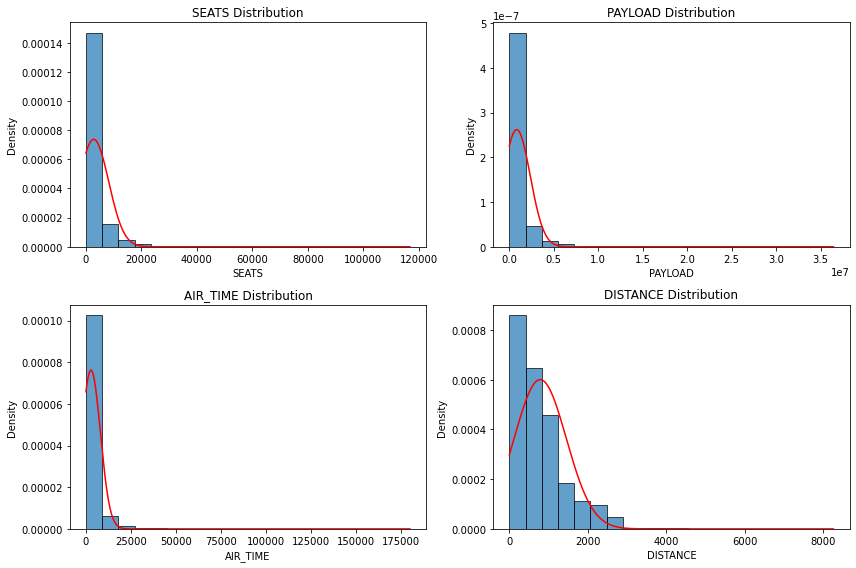

Summary Statistics for SEATS:
 count    1.949343e+06
mean     2.812463e+03
std      5.408030e+03
min      0.000000e+00
25%      1.190000e+02
50%      5.760000e+02
75%      3.627000e+03
max      1.167850e+05
Name: SEATS, dtype: float64

Summary Statistics for PAYLOAD:
 count    1.949343e+06
mean     8.305894e+05
std      1.522924e+06
min      0.000000e+00
25%      4.250000e+04
50%      2.430000e+05
75%      1.035542e+06
max      3.645000e+07
Name: PAYLOAD, dtype: float64

Summary Statistics for AIR_TIME:
 count    1.949343e+06
mean     2.830202e+03
std      5.235392e+03
min      0.000000e+00
25%      1.350000e+02
50%      7.940000e+02
75%      3.539000e+03
max      1.800070e+05
Name: AIR_TIME, dtype: float64

Summary Statistics for DISTANCE:
 count    1.949343e+06
mean     7.863295e+02
std      6.644237e+02
min      0.000000e+00
25%      2.890000e+02
50%      6.110000e+02
75%      1.055000e+03
max      8.253000e+03
Name: DISTANCE, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Assuming 'SEATS', 'PAYLOAD', 'AIR_TIME', and 'DISTANCE' columns are present in the 'flight_dataset' DataFrame

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot SEATS distribution
axes[0, 0].hist(flight_dataset['SEATS'], bins=20, edgecolor='black', alpha=0.7, density=True)
x = np.linspace(flight_dataset['SEATS'].min(), flight_dataset['SEATS'].max(), 1000)
axes[0, 0].plot(x, norm.pdf(x, flight_dataset['SEATS'].mean(), flight_dataset['SEATS'].std()), color='red')
axes[0, 0].set_xlabel('SEATS')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('SEATS Distribution')

# Plot PAYLOAD distribution
axes[0, 1].hist(flight_dataset['PAYLOAD'], bins=20, edgecolor='black', alpha=0.7, density=True)
x = np.linspace(flight_dataset['PAYLOAD'].min(), flight_dataset['PAYLOAD'].max(), 1000)
axes[0, 1].plot(x, norm.pdf(x, flight_dataset['PAYLOAD'].mean(), flight_dataset['PAYLOAD'].std()), color='red')
axes[0, 1].set_xlabel('PAYLOAD')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('PAYLOAD Distribution')

# Plot AIR_TIME distribution
axes[1, 0].hist(flight_dataset['AIR_TIME'], bins=20, edgecolor='black', alpha=0.7, density=True)
x = np.linspace(flight_dataset['AIR_TIME'].min(), flight_dataset['AIR_TIME'].max(), 1000)
axes[1, 0].plot(x, norm.pdf(x, flight_dataset['AIR_TIME'].mean(), flight_dataset['AIR_TIME'].std()), color='red')
axes[1, 0].set_xlabel('AIR_TIME')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('AIR_TIME Distribution')

# Plot DISTANCE distribution
axes[1, 1].hist(flight_dataset['DISTANCE'], bins=20, edgecolor='black', alpha=0.7, density=True)
x = np.linspace(flight_dataset['DISTANCE'].min(), flight_dataset['DISTANCE'].max(), 1000)
axes[1, 1].plot(x, norm.pdf(x, flight_dataset['DISTANCE'].mean(), flight_dataset['DISTANCE'].std()), color='red')
axes[1, 1].set_xlabel('DISTANCE')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('DISTANCE Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Print summary statistics
print("Summary Statistics for SEATS:\n", flight_dataset['SEATS'].describe())
print("\nSummary Statistics for PAYLOAD:\n", flight_dataset['PAYLOAD'].describe())
print("\nSummary Statistics for AIR_TIME:\n", flight_dataset['AIR_TIME'].describe())
print("\nSummary Statistics for DISTANCE:\n", flight_dataset['DISTANCE'].describe())

In [10]:
# Assuming 'flight_dataset_raw' is your DataFrame containing the dataset
# Drop the target column from the features
X = flight_dataset_raw.drop(['bodytype','#Engines','seatcap_range'], axis=1)

# Target column to predict
y = flight_dataset_raw[['bodytype','#Engines','seatcap_range']]

# Append 'AIRCRAFT_TYPE' to the features DataFrame
X_with_target = X.copy()
X_with_target[['bodytype','#Engines','seatcap_range']] = y
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Calculate the correlation matrix
correlation_matrix = X_with_target.corr()

# Print the correlation matrix
correlation_matrix

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,Aircraft type,Max seat capacity,#Engines,seatcap_range
DEPARTURES_SCHEDULED,1.000000,0.945834,0.708220,0.774847,0.748506,0.013267,0.111292,-0.002528,0.706671,0.666741,-0.041471,0.090172,0.035175,-0.008619,-0.008619,-0.044179,0.095897,0.043976,-0.004164,-0.004164,-0.040379,0.094006,0.043519,-0.004411,0.012924,-0.155407,-0.060960,0.002521,0.001080,-0.006399,0.012924,-0.010860,0.022416,0.056110
DEPARTURES_PERFORMED,0.945834,1.000000,0.749760,0.809950,0.783442,0.028195,0.130580,-0.008435,0.740135,0.699243,-0.031162,0.067581,0.049797,-0.015623,-0.015623,-0.048064,0.073525,0.028533,-0.010525,-0.010525,-0.043451,0.071737,0.028213,-0.023565,-0.002784,-0.122557,-0.064614,0.004779,0.003009,-0.010639,-0.002784,-0.037975,-0.018011,0.046252
PAYLOAD,0.708220,0.749760,1.000000,0.909260,0.904213,0.333368,0.260322,0.208616,0.798960,0.784727,-0.190717,0.253739,-0.108133,-0.002387,-0.002386,-0.055871,0.011975,0.086943,0.004561,0.004561,-0.049572,0.013308,0.089036,0.165057,0.150642,-0.039709,0.005944,0.005150,0.003988,0.195791,0.150642,0.236393,0.086885,0.079991
SEATS,0.774847,0.809950,0.909260,1.000000,0.991164,-0.028869,0.175469,0.163999,0.818071,0.796738,-0.190210,0.243735,-0.087669,-0.007597,-0.007597,-0.078757,0.019470,0.091180,-0.003464,-0.003464,-0.075210,0.017563,0.090905,0.137215,0.140370,-0.182207,-0.014865,0.001599,0.000134,0.152605,0.140370,0.114794,0.013653,0.041783
PASSENGERS,0.748506,0.783442,0.904213,0.991164,1.000000,-0.024973,0.186019,0.189975,0.829775,0.813518,-0.190275,0.248071,-0.090316,-0.006244,-0.006243,-0.078870,0.014686,0.094073,-0.002568,-0.002567,-0.076119,0.012885,0.093341,0.140479,0.145098,-0.177999,-0.002754,0.006690,0.005619,0.178464,0.145098,0.125175,0.013645,0.046510
FREIGHT,0.013267,0.028195,0.333368,-0.028869,-0.024973,1.000000,0.159103,0.131977,0.085585,0.094817,-0.037517,0.073612,-0.052360,0.005550,0.005551,0.029782,-0.016991,0.006669,0.018439,0.018439,0.038185,-0.001856,0.013116,0.087571,0.044978,0.269477,0.036715,0.005430,0.005619,0.126679,0.044978,0.270059,0.165917,0.080707
MAIL,0.111292,0.130580,0.260322,0.175469,0.186019,0.159103,1.000000,0.122426,0.242586,0.255033,-0.040342,0.044365,-0.030986,0.008045,0.008045,-0.013410,-0.044133,0.004511,0.017764,0.017764,0.002254,-0.038144,-0.006032,0.036114,0.023551,0.076287,-0.000967,0.004436,0.004232,0.119067,0.023551,0.100183,0.039456,0.013300
DISTANCE,-0.002528,-0.008435,0.208616,0.163999,0.189975,0.131977,0.122426,1.000000,0.326648,0.371382,-0.228977,0.382839,-0.277869,0.058315,0.058316,-0.043981,0.018835,0.234368,0.059741,0.059741,-0.040447,0.024011,0.230448,0.347187,0.326823,-0.145381,0.077118,-0.001685,-0.000697,0.976105,0.326823,0.425004,0.212096,0.132114
RAMP_TO_RAMP,0.706671,0.740135,0.798960,0.818071,0.829775,0.085585,0.242586,0.326648,1.000000,0.979019,-0.111357,0.191876,-0.060664,0.000811,0.000811,-0.063015,0.037871,0.081014,0.015907,0.015908,-0.058606,0.025565,0.105781,0.108844,0.118854,-0.137240,-0.022865,0.002922,0.001774,0.315994,0.118854,0.113648,0.025102,0.069903
AIR_TIME,0.666741,0.699243,0.784727,0.796738,0.813518,0.094817,0.255033,0.371382,0.979019,1.000000,-0.122700,0.198408,-0.063652,0.004822,0.004823,-0.060709,0.029452,0.084772,0.021755,0.021755,-0.055071,0.018160,0.111402,0.109479,0.116993,-0.131693,-0.021694,0.002936,0.001801,0.360686,0.116993,0.123030,0.025920,0.064511


In [11]:
flight_dataset_derived = flight_dataset_raw.drop(['Max seat capacity','SEATS','CLASS','DISTANCE_GROUP','YEAR','MONTH','QUARTER', 'AIRLINE_ID','CARRIER_GROUP','AIRCRAFT_GROUP','AIRCRAFT_TYPE','AIRCRAFT_CONFIG','Aircraft type','Aircraft type name','REGION','CARRIER','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEPARTURES_SCHEDULED', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER_ENTITY', 'CARRIER_NAME', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'MAIL'], axis =1)
flight_dataset_derived.head()

,DEPARTURES_PERFORMED,PAYLOAD,PASSENGERS,FREIGHT,DISTANCE,RAMP_TO_RAMP,AIR_TIME,#Engines,bodytype,seatcap_range
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,narrow,1
1,0.0,0.0,0.0,0.0,46.0,0.0,0.0,2.0,narrow,1
2,0.0,0.0,0.0,0.0,46.0,0.0,0.0,2.0,narrow,1
3,0.0,0.0,0.0,0.0,67.0,0.0,0.0,2.0,narrow,1
4,0.0,0.0,0.0,0.0,67.0,0.0,0.0,2.0,narrow,1


In [12]:
# Remove rows with NaN values in the 'bodytype' column
flight_dataset_derived = flight_dataset_derived.dropna(subset=['bodytype','#Engines', 'seatcap_range'], axis=0)

In [13]:
# Apply one-hot encoding to the categorical features
#df_encoded = pd.get_dummies(flight_dataset_derived, columns=['bodytype'])
#flight_dataset_derived['#Engines'] = flight_dataset_derived['#Engines'].astype(int)
#flight_dataset_derived['bodytype'] = flight_dataset_derived['bodytype'].map({'narrow': 0, 'wide': 1})
#flight_dataset_derived['bodytype'] = flight_dataset_derived['bodytype'].astype(int)

# Convert to integer
flight_dataset_derived['bodytype'] = flight_dataset_derived['bodytype'].astype(str)

# Fill missing values with a default value (e.g., 'unknown')
#flight_dataset_derived['bodytype'].fillna('unknown', inplace=True)

# Map 'narrow' and 'wide' to 0 and 1
bodytype_map = {'narrow': 0, 'wide': 1, 'unknown': -1}
flight_dataset_derived['bodytype'] = flight_dataset_derived['bodytype'].map(bodytype_map)

# Convert to integer
#flight_dataset_derived['bodytype'] = flight_dataset_derived['bodytype'].astype(int)

unique_bodytypes = flight_dataset_derived['bodytype'].unique()

#print(unique_bodytypes)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the input features and the target variable
X = flight_dataset_derived.drop(['bodytype', '#Engines', 'seatcap_range'], axis=1)
y = flight_dataset_derived[['bodytype','#Engines','seatcap_range']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.head()

,DEPARTURES_PERFORMED,PAYLOAD,PASSENGERS,FREIGHT,DISTANCE,RAMP_TO_RAMP,AIR_TIME
1572267,17.0,1077008.0,0.0,613864.0,284.0,1062.0,774.0
969724,4.0,149600.0,463.0,1675.0,1034.0,595.0,543.0
1443544,61.0,3167160.0,10046.0,49660.0,1900.0,15046.0,13497.0
1880607,38.0,1820858.0,6044.0,9799.0,1085.0,6978.0,5849.0
1763582,1.0,105200.0,226.0,5203.0,224.0,76.0,45.0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Create the Random Forest Classifier model
classifier = RandomForestClassifier()

# Train the model on the training data
classifier.fit(X_train, y_train)
# Make predictions on the test data
predicted = classifier.predict(X_test)
print(predicted)

[[0. 2. 2.]
 [0. 2. 1.]
 [0. 2. 3.]
 ...
 [0. 2. 2.]
 [0. 2. 1.]
 [0. 2. 2.]]


In [16]:
#prediction
#y_pred = classifier.predict(X_test) #Accuracy
from sklearn import metrics
# Calculate accuracy for 'bodytype' and '#Engines' columns
accuracy_bodytype = accuracy_score(y_test['bodytype'], predicted[:,0])
accuracy_engines = accuracy_score(y_test['#Engines'], predicted[:,1])
accuracy_seatcap_range = accuracy_score(y_test['seatcap_range'], predicted[:,2])

print("Accuracy for 'bodytype':", accuracy_bodytype)
print("Accuracy for '#Engines':", accuracy_engines)
print("Accuracy for 'seatcap_range':", accuracy_seatcap_range)

Accuracy for 'bodytype': 0.9958337655153339
Accuracy for '#Engines': 0.9963385540918992
Accuracy for 'seatcap_range': 0.9754174878124676


In [28]:
#DEPARTURES_PERFORMED	PAYLOAD	PASSENGERS	FREIGHT	DISTANCE	RAMP_TO_RAMP	AIR_TIME	FREIGHT
predicted = classifier.predict([[100, 160, 150, 400, 200, 180, 180]])
print(predicted)

[[0. 2. 1.]]


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test['bodytype'], predicted[:,0])
print(cm)

precision = precision_score(y_test['bodytype'], predicted[:,0])
recall = recall_score(y_test['bodytype'], predicted[:,0])
f1 = f1_score(y_test['bodytype'], predicted[:,0])

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[[263299    420]
 [   785  24726]]
Precision: 0.9832975423526604
Recall: 0.9692289600564462
F1 Score: 0.976212566871311


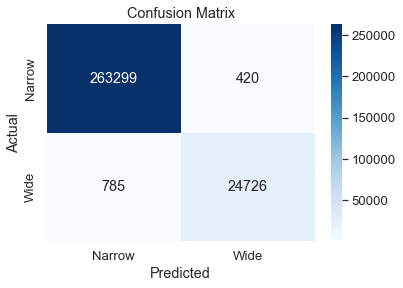

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['Narrow', 'Wide']

# Create a confusion matrix plot
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
cm = confusion_matrix(y_test['#Engines'], predicted[:,1])
print(cm)

precision = precision_score(y_test['#Engines'], predicted[:,1])
recall = recall_score(y_test['#Engines'], predicted[:,1])
f1 = f1_score(y_test['#Engines'], predicted[:,1])

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

array([[ 10535,    227,      0,      0],
       [   233, 273982,      0,    242],
       [     0,     10,      2,      0],
       [     0,    347,      0,   3652]], dtype=int64)

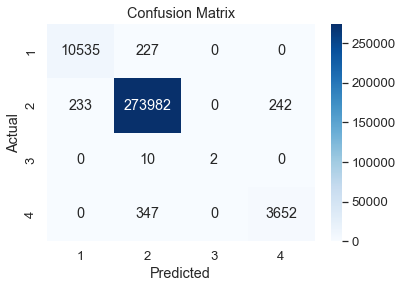

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = [1,2,3,4]

# Create a confusion matrix plot
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
cm = confusion_matrix(y_test['seatcap_range'], predicted[:,2])
print(cm)

precision = precision_score(y_test['seatcap_range'], predicted[:,2], average='micro')
recall = recall_score(y_test['seatcap_range'], predicted[:,2], average='macro')
f1 = f1_score(y_test['seatcap_range'], predicted[:,2], average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[[ 74932     61     22     52]
 [   342 128542   2727     27]
 [    48   3292  74761    193]
 [    46     10    290   3885]]
Precision: 0.9754174878124676
Recall: 0.9619451045626441
F1 Score: 0.9753853945711604


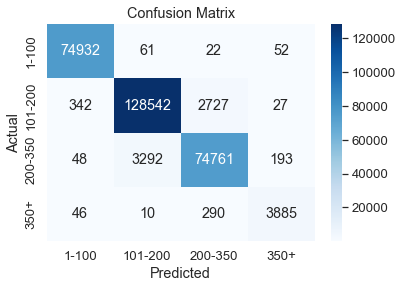

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['1-100','101-200','200-350','350+']

# Create a confusion matrix plot
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Ridge Regression for predicting Narrow/Wide-Body

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn

In [3]:
pd.set_option('display.max_columns', None)
df_bodytype = pd.read_csv("consolidated_bodytype_data.csv")
df_bodytype.head()

/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_55550/3773566271.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bodytype = pd.read_csv("consolidated_bodytype_data.csv")


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATE,SEATS/AIRCRAFT,BODYTYPE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3M,20401.0,Silver Airways,6888,D,3M,Silver Airways,1,6.0,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,4,456,1,2014,1,3,1,F,2014-03-01,0.0,narrow
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3M,20401.0,Silver Airways,6888,D,3M,Silver Airways,1,6.0,11697,1169703,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,11697,1169703,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,4,456,1,2014,1,3,1,F,2014-03-01,0.0,narrow
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3M,20401.0,Silver Airways,6888,D,3M,Silver Airways,1,6.0,11953,1195302,31953,GNV,"Gainesville, FL",FL,12,Florida,33,11953,1195302,31953,GNV,"Gainesville, FL",FL,12,Florida,33,4,456,1,2014,1,3,1,F,2014-03-01,0.0,narrow
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NK,20416.0,Spirit Air Lines,6830,D,NK,Spirit Air Lines,3,3.0,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,6,698,1,2014,2,5,1,F,2014-05-01,0.0,narrow
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NK,20416.0,Spirit Air Lines,6830,D,NK,Spirit Air Lines,3,3.0,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,6,698,1,2014,1,1,1,F,2014-01-01,0.0,narrow


In [5]:
df_with_index = df_bodytype.set_index('DATE').copy(deep=True)
df_with_index.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,SEATS/AIRCRAFT,BODYTYPE
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,1234.0,617.0,1110600.0,5553.0,3704.0,0.0,0.0,91.0,28876.0,22582.0,9K,20253.0,Cape Air,07021,D,9K,Cape Air,1,6.0,10154,1015405,30154,ACK,"Nantucket, MA",MA,25,Massachusetts,13,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1,125,1,2019,3,7,1,F,9.0,narrow
2019-11-01,2100.0,12.0,12600.0,48.0,0.0,0.0,12.0,59.0,1800.0,0.0,GCH,20267.0,Grand Canyon Helicopters,06933,D,GCH,Grand Canyon Helicopters,1,6.0,10661,1066106,30661,BLD,"Boulder City, NV",NV,32,Nevada,85,10011,1001104,30011,1G4,"Peach Springs, AZ",AZ,4,Arizona,81,3,360,1,2019,4,11,1,F,4.0,narrow
2019-05-01,2100.0,44.0,46200.0,176.0,0.0,0.0,44.0,59.0,1800.0,0.0,GCH,20267.0,Grand Canyon Helicopters,06933,D,GCH,Grand Canyon Helicopters,1,6.0,10661,1066105,30661,BLD,"Boulder City, NV",NV,32,Nevada,85,10011,1001104,30011,1G4,"Peach Springs, AZ",AZ,4,Arizona,81,3,360,1,2019,2,5,1,F,4.0,narrow
2019-10-01,2170.0,6.0,6300.0,24.0,0.0,0.0,6.0,59.0,1860.0,0.0,GCH,20267.0,Grand Canyon Helicopters,06933,D,GCH,Grand Canyon Helicopters,1,6.0,10661,1066105,30661,BLD,"Boulder City, NV",NV,32,Nevada,85,10011,1001104,30011,1G4,"Peach Springs, AZ",AZ,4,Arizona,81,3,360,1,2019,4,10,1,F,4.0,narrow
2019-01-01,2170.0,46.0,74440.0,276.0,0.0,0.0,46.0,59.0,1860.0,0.0,GCH,20267.0,Grand Canyon Helicopters,06933,D,GCH,Grand Canyon Helicopters,1,6.0,10661,1066105,30661,BLD,"Boulder City, NV",NV,32,Nevada,85,10011,1001104,30011,1G4,"Peach Springs, AZ",AZ,4,Arizona,81,3,340,1,2019,1,1,1,F,6.0,narrow


In [6]:
core_df_aggregated=df_with_index.groupby(df_with_index.index).sum()
core_df_aggregated.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,SEATS/AIRCRAFT
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,840799.0,847850.0,2.353118e+10,75764394.0,51589862.0,1.966746e+09,89420305.0,18225956.0,98471595.0,79778791.0,609137265.0,69378,99557.0,385940333,38594074437,970364557,736838,1345368,385417872,38541828428,970164101,738062,1344702,158385,17120420,36836,60697824,30228,30228,53530,2.232760e+06
2008-02-01,788639.0,800853.0,2.172953e+10,71245185.0,51421707.0,1.877296e+09,86029584.0,18364932.0,93290598.0,75356846.0,622674268.0,70333,102145.0,393932695,39393311570,991492382,748072,1345340,393760622,39376104261,991357948,751568,1347767,160888,17401685,37828,62045192,30899,61798,54256,2.260209e+06
2008-03-01,851895.0,872471.0,2.341272e+10,78157078.0,60773856.0,1.967511e+09,89537152.0,18468985.0,101851302.0,82832471.0,620676214.0,69936,101841.0,393225235,39322565519,988945202,746011,1353083,392869757,39287017815,988751881,749986,1352553,160119,17302167,37716,61854432,30804,92412,54385,2.294189e+06
2008-04-01,827096.0,855747.0,2.302606e+10,75550112.0,57007002.0,2.027786e+09,93018362.0,17566247.0,97955693.0,79729993.0,600565690.0,67511,98425.0,380124994,38012539932,956383816,722262,1289206,379785486,37978589217,955981731,724962,1288105,153251,16589630,36730,59844424,59606,119212,52148,2.193181e+06
2008-05-01,844025.0,876796.0,2.342854e+10,77338637.0,59463217.0,1.998341e+09,95594298.0,16977492.0,99450907.0,81165613.0,591383841.0,65809,97982.0,373810498,37381089659,941567821,698228,1253161,373859522,37385992008,941454583,700608,1252713,148038,16061060,37014,58932792,58698,146745,50876,2.089865e+06


In [7]:
# Step 1: Create the pivot table
aggregated_df1 = pd.pivot_table(df_with_index, index='DATE', columns='BODYTYPE', aggfunc='size', fill_value=0).reset_index()
aggregated_df1.columns.name = None
aggregated_df1 = aggregated_df1.rename(columns={'narrow': 'Narrow', 'wide': 'Wide'})

# Step 2: Merge the original DataFrame 'df_with_index' with the pivot table DataFrame 'aggregated_df123'
merged_df = pd.merge(core_df_aggregated, aggregated_df1, on='DATE')
merged_df.tail()
# The 'merged_df' DataFrame will now contain all the columns from both DataFrames.

,DATE,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,SEATS/AIRCRAFT,Narrow,Wide
179,2022-12-01,670254.0,667301.0,2.611521e+10,78140318.0,63087628.0,2.562631e+09,107083372.0,28480922.0,89968072.0,72886961.0,719426945.0,90808,109568.0,454910272,45491159993,1139354038,896066,1764072,455078608,45507993567,1139655935,895559,1771888,200392,22649047,42239,72003420,142440,427320,76024,3.873109e+06,34393,1217
180,2023-01-01,649486.0,664162.0,2.497154e+10,80066306.0,58757519.0,1.990410e+09,96723556.0,26978751.0,88815785.0,71985766.0,694309712.0,88414,105913.0,438891342,43889262845,1099438484,860284,1709058,438684227,43868551460,1099280447,862553,1712968,192951,21824406,39519,69516349,34363,34363,72432,3.869530e+06,33167,1196
181,2023-02-01,608610.0,622942.0,2.329888e+10,74767625.0,57157467.0,1.877049e+09,88764713.0,25752033.0,82416334.0,67187164.0,671178170.0,83992,102489.0,423511368,42351260271,1061143603,823788,1625653,423548999,42355023645,1061031797,823898,1631450,184833,20932843,38374,67074588,33156,66312,69407,3.659583e+06,31951,1205
182,2023-03-01,699599.0,719357.0,2.695995e+10,86548078.0,70258611.0,2.243423e+09,100528027.0,27364852.0,96598159.0,78875024.0,708198037.0,88855,108244.0,447312874,44731416890,1120088302,869959,1728144,447267022,44726831814,1119817719,872019,1732503,194781,22132474,40413,70796908,34996,104988,73663,3.947193e+06,33687,1309
183,2023-04-01,675071.0,690624.0,2.557215e+10,83104475.0,68337093.0,2.022017e+09,78655690.0,26106935.0,90825288.0,74301858.0,677480839.0,86398,104443.0,428478270,42847951219,1073855712,842397,1641889,428133628,42813486985,1073532676,841637,1642929,187607,21326793,38939,67904018,67132,134264,70437,3.827551e+06,32296,1270


In [8]:
merged_with_index = merged_df.set_index('DATE').copy(deep=True)
merged_with_index.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,SEATS/AIRCRAFT,Narrow,Wide
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,840799.0,847850.0,2.353118e+10,75764394.0,51589862.0,1.966746e+09,89420305.0,18225956.0,98471595.0,79778791.0,609137265.0,69378,99557.0,385940333,38594074437,970364557,736838,1345368,385417872,38541828428,970164101,738062,1344702,158385,17120420,36836,60697824,30228,30228,53530,2.232760e+06,29673,555
2008-02-01,788639.0,800853.0,2.172953e+10,71245185.0,51421707.0,1.877296e+09,86029584.0,18364932.0,93290598.0,75356846.0,622674268.0,70333,102145.0,393932695,39393311570,991492382,748072,1345340,393760622,39376104261,991357948,751568,1347767,160888,17401685,37828,62045192,30899,61798,54256,2.260209e+06,30402,497
2008-03-01,851895.0,872471.0,2.341272e+10,78157078.0,60773856.0,1.967511e+09,89537152.0,18468985.0,101851302.0,82832471.0,620676214.0,69936,101841.0,393225235,39322565519,988945202,746011,1353083,392869757,39287017815,988751881,749986,1352553,160119,17302167,37716,61854432,30804,92412,54385,2.294189e+06,30314,490
2008-04-01,827096.0,855747.0,2.302606e+10,75550112.0,57007002.0,2.027786e+09,93018362.0,17566247.0,97955693.0,79729993.0,600565690.0,67511,98425.0,380124994,38012539932,956383816,722262,1289206,379785486,37978589217,955981731,724962,1288105,153251,16589630,36730,59844424,59606,119212,52148,2.193181e+06,29336,467
2008-05-01,844025.0,876796.0,2.342854e+10,77338637.0,59463217.0,1.998341e+09,95594298.0,16977492.0,99450907.0,81165613.0,591383841.0,65809,97982.0,373810498,37381089659,941567821,698228,1253161,373859522,37385992008,941454583,700608,1252713,148038,16061060,37014,58932792,58698,146745,50876,2.089865e+06,28917,432


In [9]:
merged_with_index.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,SEATS/AIRCRAFT,Narrow,Wide
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-01,670254.0,667301.0,2.611521e+10,78140318.0,63087628.0,2.562631e+09,107083372.0,28480922.0,89968072.0,72886961.0,719426945.0,90808,109568.0,454910272,45491159993,1139354038,896066,1764072,455078608,45507993567,1139655935,895559,1771888,200392,22649047,42239,72003420,142440,427320,76024,3.873109e+06,34393,1217
2023-01-01,649486.0,664162.0,2.497154e+10,80066306.0,58757519.0,1.990410e+09,96723556.0,26978751.0,88815785.0,71985766.0,694309712.0,88414,105913.0,438891342,43889262845,1099438484,860284,1709058,438684227,43868551460,1099280447,862553,1712968,192951,21824406,39519,69516349,34363,34363,72432,3.869530e+06,33167,1196
2023-02-01,608610.0,622942.0,2.329888e+10,74767625.0,57157467.0,1.877049e+09,88764713.0,25752033.0,82416334.0,67187164.0,671178170.0,83992,102489.0,423511368,42351260271,1061143603,823788,1625653,423548999,42355023645,1061031797,823898,1631450,184833,20932843,38374,67074588,33156,66312,69407,3.659583e+06,31951,1205
2023-03-01,699599.0,719357.0,2.695995e+10,86548078.0,70258611.0,2.243423e+09,100528027.0,27364852.0,96598159.0,78875024.0,708198037.0,88855,108244.0,447312874,44731416890,1120088302,869959,1728144,447267022,44726831814,1119817719,872019,1732503,194781,22132474,40413,70796908,34996,104988,73663,3.947193e+06,33687,1309
2023-04-01,675071.0,690624.0,2.557215e+10,83104475.0,68337093.0,2.022017e+09,78655690.0,26106935.0,90825288.0,74301858.0,677480839.0,86398,104443.0,428478270,42847951219,1073855712,842397,1641889,428133628,42813486985,1073532676,841637,1642929,187607,21326793,38939,67904018,67132,134264,70437,3.827551e+06,32296,1270


In [10]:
core_df_aggregated=merged_with_index[["DEPARTURES_SCHEDULED", "DEPARTURES_PERFORMED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME", "Narrow","Wide"]]
# core_df_aggregated=core_df.groupby(core_df.index).sum()
core_df_aggregated.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME,Narrow,Wide
DATE,,,,,,,,,
2008-01-01,840799.0,847850.0,2.353118e+10,75764394.0,51589862.0,98471595.0,79778791.0,29673,555
2008-02-01,788639.0,800853.0,2.172953e+10,71245185.0,51421707.0,93290598.0,75356846.0,30402,497
2008-03-01,851895.0,872471.0,2.341272e+10,78157078.0,60773856.0,101851302.0,82832471.0,30314,490
2008-04-01,827096.0,855747.0,2.302606e+10,75550112.0,57007002.0,97955693.0,79729993.0,29336,467
2008-05-01,844025.0,876796.0,2.342854e+10,77338637.0,59463217.0,99450907.0,81165613.0,28917,432


In [11]:
# Perform feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(core_df_aggregated.drop(columns=["Narrow","Wide"]))

# Original column names
original_columns = ["DEPARTURES_SCHEDULED", "DEPARTURES_PERFORMED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]

# Create a DataFrame with the scaled data
core_df_aggregated_scaled = pd.DataFrame(df_scaled, columns=original_columns)
core_df_aggregated_scaled

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
0,1.541477,1.236752,0.488573,0.414298,-0.410912,1.002803,0.961680
1,0.964957,0.760616,-0.173845,-0.034590,-0.425487,0.547909,0.471733
2,1.664120,1.486192,0.445021,0.651960,0.385117,1.299543,1.300025
3,1.390019,1.316758,0.302855,0.393014,0.058622,0.957507,0.956273
4,1.577133,1.530010,0.450835,0.570665,0.271517,1.088787,1.115339
...,...,...,...,...,...,...,...
179,-0.343541,-0.592426,1.438655,0.650295,0.585665,0.256190,0.198073
180,-0.573087,-0.624227,1.018158,0.841601,0.210350,0.155018,0.098221
181,-1.024886,-1.041836,0.403163,0.315290,0.071664,-0.406857,-0.433459
182,-0.019193,-0.065036,1.749244,1.485428,1.207215,0.838314,0.861544


In [12]:
core_df_aggregated_scaled.index = core_df_aggregated.index
core_df_aggregated_scaled

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
DATE,,,,,,,
2008-01-01,1.541477,1.236752,0.488573,0.414298,-0.410912,1.002803,0.961680
2008-02-01,0.964957,0.760616,-0.173845,-0.034590,-0.425487,0.547909,0.471733
2008-03-01,1.664120,1.486192,0.445021,0.651960,0.385117,1.299543,1.300025
2008-04-01,1.390019,1.316758,0.302855,0.393014,0.058622,0.957507,0.956273
2008-05-01,1.577133,1.530010,0.450835,0.570665,0.271517,1.088787,1.115339
...,...,...,...,...,...,...,...
2022-12-01,-0.343541,-0.592426,1.438655,0.650295,0.585665,0.256190,0.198073
2023-01-01,-0.573087,-0.624227,1.018158,0.841601,0.210350,0.155018,0.098221
2023-02-01,-1.024886,-1.041836,0.403163,0.315290,0.071664,-0.406857,-0.433459


In [13]:
# Get columns present in core_df_aggregated but not in core_df_aggregated_scaled
additional_columns = core_df_aggregated.columns.difference(core_df_aggregated_scaled.columns)

# Concatenate the DataFrames while excluding duplicate columns
merged_scaled_df = pd.concat([core_df_aggregated_scaled, core_df_aggregated[additional_columns]], axis=1)
merged_scaled_df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME,Narrow,Wide
DATE,,,,,,,,,
2008-01-01,1.541477,1.236752,0.488573,0.414298,-0.410912,1.002803,0.961680,29673,555
2008-02-01,0.964957,0.760616,-0.173845,-0.034590,-0.425487,0.547909,0.471733,30402,497
2008-03-01,1.664120,1.486192,0.445021,0.651960,0.385117,1.299543,1.300025,30314,490
2008-04-01,1.390019,1.316758,0.302855,0.393014,0.058622,0.957507,0.956273,29336,467
2008-05-01,1.577133,1.530010,0.450835,0.570665,0.271517,1.088787,1.115339,28917,432


## Ridge Regression Implementation

In [48]:
predictors=["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS","PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]

In [49]:
train=merged_scaled_df.loc[:"2016-12-01"]
train.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME,Narrow,Wide
DATE,,,,,,,,,
2016-08-01,0.67,0.63,0.62,0.79,0.72,0.7,0.69,31608,792
2016-09-01,-0.036,0.0097,0.0072,0.19,0.27,-0.088,-0.099,29929,812
2016-10-01,0.084,0.15,0.32,0.44,0.54,0.13,0.14,29671,834
2016-11-01,-0.24,-0.15,0.15,0.19,0.33,-0.11,-0.081,31601,814
2016-12-01,0.014,-0.041,0.9,0.28,0.32,0.39,0.41,31914,959


In [50]:
test=merged_scaled_df.loc["2017-01-01":"2023-12-01"]
test.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME,Narrow,Wide
DATE,,,,,,,,,
2017-01-01,-0.24,-0.34,-0.084,0.08,-0.12,-0.0065,-0.034,30820,788
2017-02-01,-0.87,-0.88,-0.74,-0.52,-0.4,-0.73,-0.73,29014,651
2017-03-01,0.32,0.26,0.7,0.69,0.73,0.57,0.6,30506,638
2017-04-01,-0.0079,-0.027,0.27,0.4,0.49,0.2,0.23,29881,737
2017-05-01,0.3,0.35,0.63,0.75,0.78,0.52,0.53,29189,653


## Narrow Body

In [65]:
paramters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 1e+4,1e+6,1e+8, 1e+10,1e+14, 1e+18]}
ridge = Ridge()
ridge_regressor=GridSearchCV(ridge, paramters,scoring='r2',cv=10)
ridge_regressor.fit(train[predictors], train["Narrow"])
alpha_param= ridge_regressor.best_params_['alpha']
alpha_param
# print(ridge_regressor.best_score_)

1

In [66]:
ridge = Ridge(alpha=alpha_param)
ridge.fit(train[predictors], train["Narrow"])
predictions=ridge.predict(test[predictors])
predictions

array([29861.61400011, 28857.6528715 , 31386.65227697, 30638.4701707 ,
       31245.34012674, 31607.09683956, 32517.61554116, 32625.23183217,
       30284.3202503 , 31552.11638793, 31873.18789033, 32386.5252598 ,
       30455.42107013, 29836.05377663, 31835.5338679 , 31473.90739272,
       32212.44686129, 32255.64106808, 32595.68941248, 32536.62668366,
       31082.82850472, 32402.8064722 , 31811.79872391, 32608.81919972,
       31086.74797544, 30111.36556481, 32512.85507348, 31762.52516002,
       32683.42339992, 32656.65479751, 33124.22330799, 34261.81665691,
       31800.13390501, 33286.56209568, 32437.8722378 , 34035.04253966,
       32384.94150962, 31538.75418185, 28316.07940485, 20917.56817663,
       22810.51434894, 24366.04174072, 26923.14711148, 26915.51754437,
       26236.79457886, 27337.31759905, 27591.43433996, 28947.4058004 ,
       27296.97061233, 26036.54526279, 29516.58979629, 29605.02119836,
       30794.35774107, 31757.39554121, 32902.99113041, 32216.80944989,
      

In [67]:
combined=pd.concat([test["Narrow"],pd.Series(predictions, index=test.index)], axis=1)
#converting the precitions numpy array as pandas series with the same index as the test data
combined.columns=["Actual", "Predicted"]
#combined["difference"] = combined["predicted"] - combined["actual"]
print("\033[1mNarrow Passenger Demand\033[0m")
combined.head(10)

Narrow Passenger Demand


,Actual,Predicted
DATE,,
2017-01-01,30820,3e+04
2017-02-01,29014,2.9e+04
2017-03-01,30506,3.1e+04
2017-04-01,29881,3.1e+04
2017-05-01,29189,3.1e+04
2017-06-01,31219,3.2e+04
2017-07-01,30602,3.3e+04
2017-08-01,31648,3.3e+04
2017-09-01,30073,3e+04


Text(0.5, 1.0, 'Actual vs Predicted Narrow Body Aircrafts for years 2017-2023')

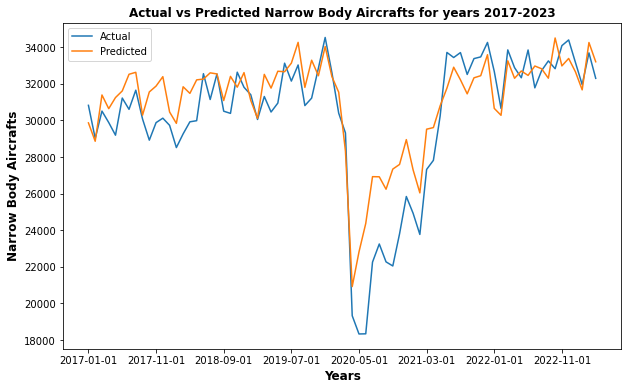

In [69]:
ax=combined.plot(figsize=(10, 6))
# Adding labels and title with increased font size and bold
ax.set_xlabel('Years', fontweight='bold', fontsize=12)
ax.set_ylabel('Narrow Body Aircrafts', fontweight='bold', fontsize=12)
ax.set_title('Actual vs Predicted Narrow Body Aircrafts for years 2017-2023', fontweight='bold', fontsize=12)

In [55]:
# Display the coefficients obtained from the Ridge regression model
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]
ridge_coefs = ridge.coef_

print("Ridge regression coefficients:\n")
for col_name, coef in zip(predictors, ridge_coefs):
    print(f"{col_name}: {coef:.6f}")

Ridge regression coefficients:

DEPARTURES_SCHEDULED: -1512.421542
PAYLOAD: 1847.397315
SEATS: -84.015106
PASSENGERS: 503.913221
RAMP_TO_RAMP: 768.948628
AIR_TIME: 146.872044


In [56]:
from sklearn.linear_model import Ridge
import pandas as pd

# Initialize predictor variables (replace with your actual column names)
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS","PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 10e+3,10e+5,10e+7, 10e+9,10e+13, 10e+17]

# Initialize the dataframe for storing coefficients.
col = ["rss", "intercept"] + [f"coef_{col_name}" for col_name in predictors]
ind = [f"alpha_{alpha:.2g}" for alpha in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Perform Ridge regression for each alpha value
for i, alpha in enumerate(alpha_ridge):
    ridge = Ridge(alpha=alpha)
    ridge.fit(train[predictors], train["Narrow"])
    coef_matrix_ridge.iloc[i, 0] = ((ridge.predict(test[predictors]) - test["Narrow"]) ** 2).sum()
    coef_matrix_ridge.iloc[i, 1] = ridge.intercept_
    coef_matrix_ridge.iloc[i, 2:] = ridge.coef_

#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge



,rss,intercept,coef_DEPARTURES_SCHEDULED,coef_PAYLOAD,coef_SEATS,coef_PASSENGERS,coef_RAMP_TO_RAMP,coef_AIR_TIME
alpha_1e-15,3.6e+08,3e+04,-1.8e+03,2.6e+03,-1.6e+03,8.2e+02,2.3e+03,-7.2e+02
alpha_1e-10,3.6e+08,3e+04,-1.8e+03,2.6e+03,-1.6e+03,8.2e+02,2.3e+03,-7.2e+02
alpha_1e-08,3.6e+08,3e+04,-1.8e+03,2.6e+03,-1.6e+03,8.2e+02,2.3e+03,-7.2e+02
alpha_0.0001,3.6e+08,3e+04,-1.8e+03,2.6e+03,-1.6e+03,8.2e+02,2.3e+03,-7.2e+02
alpha_0.001,3.6e+08,3e+04,-1.8e+03,2.6e+03,-1.6e+03,8.2e+02,2.3e+03,-7.1e+02
alpha_0.01,3.6e+08,3e+04,-1.8e+03,2.6e+03,-1.5e+03,8e+02,2.2e+03,-6.7e+02
alpha_1,2.8e+08,3e+04,-1.5e+03,1.8e+03,-84,5e+02,7.7e+02,1.5e+02
alpha_5,2.3e+08,2.9e+04,-9.5e+02,1.2e+03,3.7e+02,6.5e+02,2.7e+02,1.7e+02
alpha_10,2.5e+08,2.9e+04,-6.8e+02,9e+02,3.9e+02,6.4e+02,2e+02,1.7e+02
alpha_20,3.2e+08,2.9e+04,-4.2e+02,6.6e+02,3.6e+02,5.6e+02,1.7e+02,1.8e+02


In [57]:
from sklearn.metrics import r2_score
import numpy as np
    
    # Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    r2_value = r2_score(forecast,  actual)
#     acf1 = acf(fitted - test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax,
            'r2_value': r2_value})


accuracy_metrics = forecast_accuracy(predictions, test["Narrow"])
print("Model Performance Evaluation Metrics:\n")
for key, value in accuracy_metrics.items():
    print(f"{key}: {value:.4f}")

Model Performance Evaluation Metrics:

mape: 0.0545
me: 881.4944
mae: 1453.4072
mpe: 0.0371
rmse: 1905.2229
corr: 0.9282
minmax: 0.0492
r2_value: 0.4481


/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_55550/2268062843.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_55550/2268062843.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)


## Wide Body

In [58]:
paramters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 1e+4,1e+6,1e+8, 1e+10,1e+14, 1e+18]}
ridge = Ridge()
ridge_regressor=GridSearchCV(ridge, paramters,scoring='r2',cv=10)
ridge_regressor.fit(train[predictors], train["Wide"])
alpha_param= ridge_regressor.best_params_['alpha']
alpha_param

1

In [59]:
ridge = Ridge(alpha=alpha_param)
ridge.fit(train[predictors], train["Wide"])
predictions=ridge.predict(test[predictors])
predictions

array([ 710.99828755,  684.59049576,  746.88570453,  718.88225705,
        734.76199738,  729.69367183,  804.1118777 ,  844.84573304,
        774.72321427,  785.96070065,  867.87990454,  878.85264289,
        748.82980538,  726.08048705,  754.55268997,  747.65439706,
        778.54538487,  746.40089665,  741.22918634,  761.70887196,
        770.84055338,  823.28160194,  792.32683901,  857.68460856,
        772.09579183,  732.71731338,  764.39666638,  741.3220761 ,
        765.24737787,  754.92576685,  768.35119921,  935.02797815,
        810.50737759,  878.21761182,  856.0666506 ,  933.03981779,
        861.96326429,  820.49827492,  764.66063077,  610.57020493,
        751.84190155,  790.63152833,  897.98986534,  868.56174212,
        842.14426496,  891.21006763,  910.8758367 , 1020.7679432 ,
        889.01857693,  790.32439131,  908.0643926 ,  871.17696228,
        877.06272302,  867.61496837,  892.22578921,  862.17579695,
        914.70860073,  931.81845155,  952.60048513, 1052.05508

In [60]:
combined=pd.concat([test["Wide"],pd.Series(predictions, index=test.index)], axis=1)
#converting the precitions numpy array as pandas series with the same index as the test data
combined.columns=["Actual", "Predicted"]
#combined["difference"] = combined["predicted"] - combined["actual"]
print("\033[1mWide Passenger Demand\033[0m")
combined.head(12)

Wide Passenger Demand


,Actual,Predicted
DATE,,
2017-01-01,788,7.1e+02
2017-02-01,651,6.8e+02
2017-03-01,638,7.5e+02
2017-04-01,737,7.2e+02
2017-05-01,653,7.3e+02
2017-06-01,630,7.3e+02
2017-07-01,601,8e+02
2017-08-01,730,8.4e+02
2017-09-01,730,7.7e+02


Text(0.5, 1.0, 'Actual vs Predicted Wide Body Aircrafts for years 2017-2023')

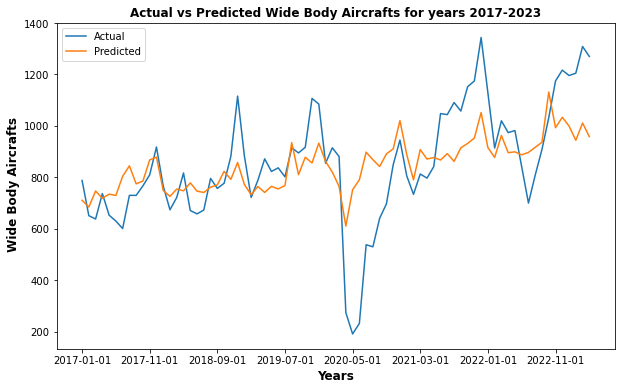

In [61]:
ax=combined.plot(figsize=(10, 6))
# Adding labels and title with increased font size and bold
ax.set_xlabel('Years', fontweight='bold', fontsize=12)
ax.set_ylabel(' Wide Body Aircrafts', fontweight='bold', fontsize=12)
ax.set_title('Actual vs Predicted Wide Body Aircrafts for years 2017-2023', fontweight='bold', fontsize=12)

In [62]:
# Display the coefficients obtained from the Ridge regression model
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]
ridge_coefs = ridge.coef_

print("Ridge regression coefficients:\n")
for col_name, coef in zip(predictors, ridge_coefs):
    print(f"{col_name}: {coef:.6f}")

Ridge regression coefficients:

DEPARTURES_SCHEDULED: -142.804600
PAYLOAD: 225.523945
SEATS: 19.393886
PASSENGERS: -53.163966
RAMP_TO_RAMP: 17.896161
AIR_TIME: -59.884278


In [63]:
from sklearn.linear_model import Ridge
import pandas as pd

# Initialize predictor variables (replace with your actual column names)
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS","PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 10e+3,10e+5,10e+7, 10e+9,10e+13, 10e+17]

# Initialize the dataframe for storing coefficients.
col = ["rss", "intercept"] + [f"coef_{col_name}" for col_name in predictors]
ind = [f"alpha_{alpha:.2g}" for alpha in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Perform Ridge regression for each alpha value
for i, alpha in enumerate(alpha_ridge):
    ridge = Ridge(alpha=alpha)
    ridge.fit(train[predictors], train["Wide"])
    coef_matrix_ridge.iloc[i, 0] = ((ridge.predict(test[predictors]) - test["Wide"]) ** 2).sum()
    coef_matrix_ridge.iloc[i, 1] = ridge.intercept_
    coef_matrix_ridge.iloc[i, 2:] = ridge.coef_

#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_DEPARTURES_SCHEDULED,coef_PAYLOAD,coef_SEATS,coef_PASSENGERS,coef_RAMP_TO_RAMP,coef_AIR_TIME
alpha_1e-15,2.6e+06,7.1e+02,-1.5e+02,3.1e+02,-37,-59,1.4e+02,-1.9e+02
alpha_1e-10,2.6e+06,7.1e+02,-1.5e+02,3.1e+02,-37,-59,1.4e+02,-1.9e+02
alpha_1e-08,2.6e+06,7.1e+02,-1.5e+02,3.1e+02,-37,-59,1.4e+02,-1.9e+02
alpha_0.0001,2.6e+06,7.1e+02,-1.5e+02,3.1e+02,-37,-59,1.4e+02,-1.9e+02
alpha_0.001,2.6e+06,7.1e+02,-1.5e+02,3.1e+02,-36,-59,1.4e+02,-1.9e+02
alpha_0.01,2.6e+06,7.1e+02,-1.5e+02,3.1e+02,-34,-60,1.3e+02,-1.9e+02
alpha_1,2.3e+06,6.9e+02,-1.4e+02,2.3e+02,19,-53,18,-60
alpha_5,3.3e+06,6.5e+02,-1e+02,1.2e+02,26,-1.7,-6.9,-25
alpha_10,4.5e+06,6.3e+02,-78,83,22,13,-8.9,-17
alpha_20,5.8e+06,6.1e+02,-54,51,17,17,-7.8,-10


In [64]:
from sklearn.metrics import r2_score
import numpy as np
    
    # Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    r2_value = r2_score(forecast,  actual)
#     acf1 = acf(fitted - test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax,
            'r2_value': r2_value})


accuracy_metrics = forecast_accuracy(predictions, test["Wide"])
print("Model Performance Evaluation Metrics:\n")
for key, value in accuracy_metrics.items():
    print(f"{key}: {value:.4f}")

Model Performance Evaluation Metrics:

mape: 0.2135
me: -5.2304
mae: 129.4449
mpe: 0.0879
rmse: 172.5320
corr: 0.6923
minmax: 0.1399
r2_value: -2.1661


/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_55550/1489016673.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_55550/1489016673.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)


# End of Ridge Regression to predict narrow/wide-body

# Ridge Regression for predicting passenger demand

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.linear_model import Lasso

# Set the option to display all columns of DataFrames without truncation
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("consolidated_data.csv")
df.tail()

/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_55927/1459921988.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("consolidated_data.csv")


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
5531395,760.0,754.0,23852100.0,96512.0,74019.0,489932.0,0.0,100.0,33935.0,16416.0,HA,19690.0,Hawaiian Airlines Inc.,05375,D,HA,Hawaiian Airlines Inc.,3,3.0,12173,1217305,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,13830,1383002,33830,OGG,"Kahului, HI",HI,15,Hawaii,2,6,608,1,2023,1,3,1,F
5531396,779.0,779.0,934800.0,4102.0,2077.0,14823.0,0.0,11.0,10554.0,8217.0,1SQ,21570.0,Star Marianas Air Inc.,01169,D,1SQ,Star Marianas Air Inc.,1,6.0,14955,1495503,34955,SPN,"Saipan, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,15215,1521503,35215,TIQ,"Tinian, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,2,4,1,F
5531397,780.0,780.0,936000.0,4105.0,1961.0,3107.0,0.0,11.0,10068.0,7728.0,1SQ,21570.0,Star Marianas Air Inc.,01169,D,1SQ,Star Marianas Air Inc.,1,6.0,15215,1521503,35215,TIQ,"Tinian, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,14955,1495503,34955,SPN,"Saipan, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,2,4,1,F
5531398,875.0,875.0,1050000.0,4547.0,2382.0,14878.0,0.0,11.0,11890.0,9265.0,1SQ,21570.0,Star Marianas Air Inc.,01169,D,1SQ,Star Marianas Air Inc.,1,6.0,14955,1495503,34955,SPN,"Saipan, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,15215,1521503,35215,TIQ,"Tinian, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,1,3,1,F
5531399,875.0,875.0,1050000.0,4547.0,2430.0,2394.0,0.0,11.0,10921.0,8296.0,1SQ,21570.0,Star Marianas Air Inc.,01169,D,1SQ,Star Marianas Air Inc.,1,6.0,15215,1521503,35215,TIQ,"Tinian, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,14955,1495503,34955,SPN,"Saipan, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,1,3,1,F


In [5]:
# Creates a new datetime column 'DATE' using 'YEAR' and 'MONTH' columns
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7H,20327.0,"Northern Pacific Airways, Inc. Dba Ravn Alaska",6989,D,7H,Era Aviation,1,5.0,10299,1029902,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,10299,1029902,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,4,405,1,2008,2,4,1,F,2008-04-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,12649,1264901,32649,KEB,"Nanwalek, AK",AK,2,Alaska,1,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L,2008-06-01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,12649,1264901,32649,KEB,"Nanwalek, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L,2008-06-01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,14942,1494201,34942,SOV,"Seldovia, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L,2008-06-01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,14942,1494201,34942,SOV,"Seldovia, AK",AK,2,Alaska,1,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L,2008-06-01


In [6]:
# Create a new DataFrame with 'DATE' column set as the index
df_with_index = df.set_index('DATE').copy(deep=True)
df_with_index.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7H,20327.0,"Northern Pacific Airways, Inc. Dba Ravn Alaska",6989,D,7H,Era Aviation,1,5.0,10299,1029902,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,10299,1029902,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,4,405,1,2008,2,4,1,F
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,12649,1264901,32649,KEB,"Nanwalek, AK",AK,2,Alaska,1,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,12649,1264901,32649,KEB,"Nanwalek, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,14942,1494201,34942,SOV,"Seldovia, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2E,20319.0,Smokey Bay Air Inc.,6971,D,2E,Smokey Bay Air Inc.,1,5.0,14942,1494201,34942,SOV,"Seldovia, AK",AK,2,Alaska,1,14088,1408801,34088,PGM,"Port Graham, AK",AK,2,Alaska,1,0,35,1,2008,2,6,1,L


In [7]:
# Display the sorted correlation coefficients to identify features most positively correlated with passenger demand.
correlation_matrix = df_with_index.corr()
passengers_correlation = correlation_matrix["PASSENGERS"].sort_values(ascending=False)
passengers_correlation

PASSENGERS               1.000000
SEATS                    0.986715
PAYLOAD                  0.836063
AIR_TIME                 0.811425
DEPARTURES_PERFORMED     0.806268
DEPARTURES_SCHEDULED     0.789884
RAMP_TO_RAMP             0.759665
CARRIER_GROUP            0.275808
AIRCRAFT_TYPE            0.187619
AIRCRAFT_GROUP           0.185793
DISTANCE                 0.178179
DISTANCE_GROUP           0.156682
ORIGIN_WAC               0.144358
DEST_WAC                 0.143845
MAIL                     0.105055
ORIGIN_STATE_FIPS        0.057887
DEST_STATE_FIPS          0.056547
QUARTER                  0.008743
MONTH                    0.007642
YEAR                    -0.011805
DEST_AIRPORT_SEQ_ID     -0.014252
DEST_AIRPORT_ID         -0.014252
ORIGIN_AIRPORT_SEQ_ID   -0.016236
ORIGIN_AIRPORT_ID       -0.016237
FREIGHT                 -0.051362
DEST_CITY_MARKET_ID     -0.094676
ORIGIN_CITY_MARKET_ID   -0.096565
CARRIER_GROUP_NEW       -0.122538
AIRCRAFT_CONFIG         -0.187761
AIRLINE_ID    

In [8]:
# Set the correlation threshold to determine relevant features
correlation_threshold = 0.3

# Filter features based on correlation with target variable
relevant_features = passengers_correlation[passengers_correlation.abs() > correlation_threshold].index.tolist()

relevant_features

['PASSENGERS',
 'SEATS',
 'PAYLOAD',
 'AIR_TIME',
 'DEPARTURES_PERFORMED',
 'DEPARTURES_SCHEDULED',
 'RAMP_TO_RAMP']

In [9]:
# df containing the features crucial for our analysis and modeling
core_df=df_with_index[["DEPARTURES_SCHEDULED", "DEPARTURES_PERFORMED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]]
# core_df_aggregated=core_df.groupby(core_df.index).sum()
core_df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
DATE,,,,,,,
2008-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 576x432 with 0 Axes>

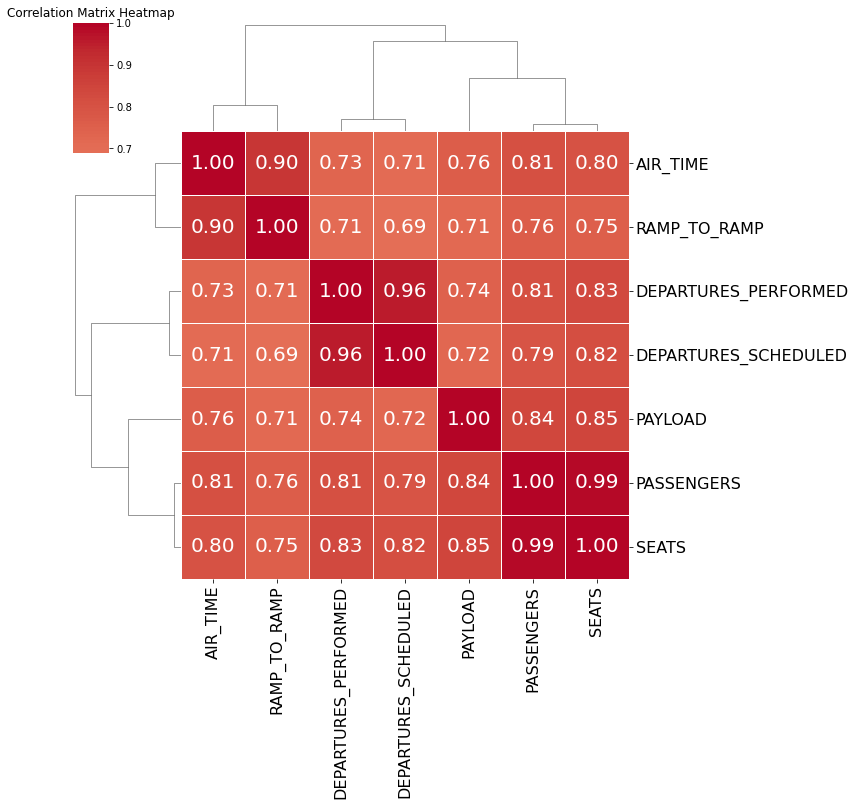

In [10]:
# Visualize the correlation matrix

# Create a pandas DataFrame
df_correlation_matrix = pd.DataFrame(core_df[relevant_features])

# # Compute the correlation matrix
correlation_matrix = df_correlation_matrix.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
clustermap=sns.clustermap(correlation_matrix, annot=True, annot_kws={"size": 20}, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, metric="euclidean", method="ward")
plt.title("Correlation Matrix Heatmap")

# Increase the font size of feature names (row and column labels)
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), fontsize=16)
plt.setp(clustermap.ax_heatmap.xaxis.get_majorticklabels(), fontsize=16)
plt.show()

# VIF

It is a measure of multicollinearity, which indicates how much the variance of the estimated regression coefficient is increased due to collinearity with other predictor variables. In general, a VIF value greater than 10 may suggest high multicollinearity, which can make it challenging to interpret the individual effects of the correlated variables on the target variable. Lower VIF values are desirable, indicating lower multicollinearity.

In [11]:
# Calculate VIF for each feature

# Create an empty DataFrame to store VIF results
vif_data = pd.DataFrame()

# Select the columns for VIF calculation
vif_df=core_df[["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]]

# Perform feature scaling
scaler = StandardScaler()
core_df_scaled = scaler.fit_transform(vif_df)

# Populate the "feature" column with the selected feature names
vif_data["Feature"] = vif_df.columns

# Calculate VIF for each feature using a loop
vif_data["VIF"] = [variance_inflation_factor(core_df_scaled, i) for i in range(len(vif_df.columns))]
vif_data

,Feature,VIF
0,DEPARTURES_SCHEDULED,3.141487
1,PAYLOAD,3.815269
2,SEATS,5.614943
3,RAMP_TO_RAMP,5.294276
4,AIR_TIME,6.449990


In [12]:
core_df=core_df[["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]]
core_df

,DEPARTURES_SCHEDULED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
DATE,,,,,,
2008-04-01,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0
2008-06-01,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-03-01,760.0,23852100.0,96512.0,74019.0,33935.0,16416.0
2023-04-01,779.0,934800.0,4102.0,2077.0,10554.0,8217.0
2023-04-01,780.0,936000.0,4105.0,1961.0,10068.0,7728.0


In [13]:
# Aggregate the original data by summing the values of each column for each unique date,
# creating a new DataFrame with monthly aggregated data for further analysis or modeling.
core_df_aggregated=core_df.groupby(core_df.index).sum()
core_df_aggregated.head()

,DEPARTURES_SCHEDULED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
DATE,,,,,,
2008-01-01,840799.0,2.353118e+10,75764394.0,51589862.0,98471595.0,79778791.0
2008-02-01,788639.0,2.172953e+10,71245185.0,51421707.0,93290598.0,75356846.0
2008-03-01,851895.0,2.341272e+10,78157078.0,60773856.0,101851302.0,82832471.0
2008-04-01,827096.0,2.302606e+10,75550112.0,57007002.0,97955693.0,79729993.0
2008-05-01,844025.0,2.342854e+10,77338637.0,59463217.0,99450907.0,81165613.0


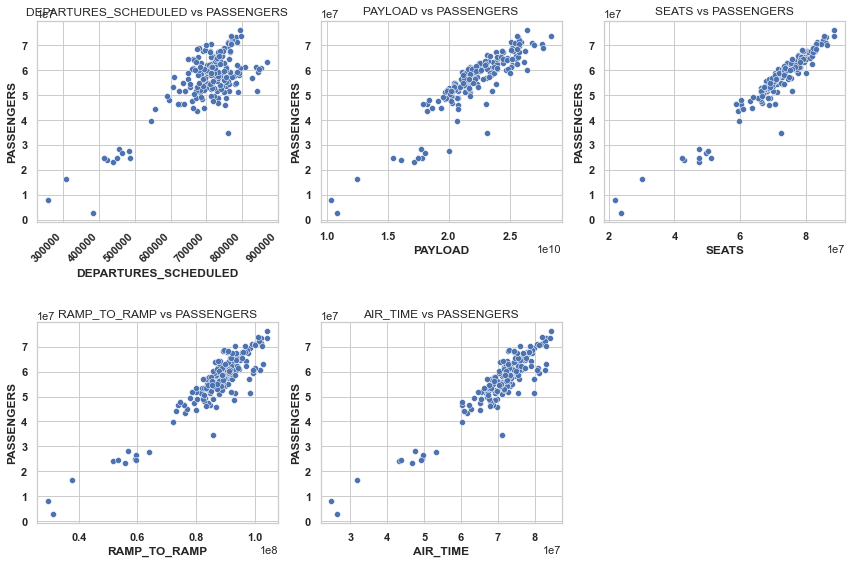

In [13]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create scatter plots for each predictor variable against "PASSENGERS"
plt.figure(figsize=(12, 8))

# Create subplots
plt.subplot(2, 3, 1)
scatter = sns.scatterplot(x=core_df_aggregated['DEPARTURES_SCHEDULED'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('DEPARTURES_SCHEDULED vs PASSENGERS')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('DEPARTURES_SCHEDULED', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# plt.subplot(2, 3, 2)
# sns.scatterplot(x=core_df_aggregated['DEPARTURES_PERFORMED'], y=core_df_aggregated['PASSENGERS'])
# plt.title('DEPARTURES_PERFORMED vs PASSENGERS')
# # plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

plt.subplot(2, 3, 2)
scatter = sns.scatterplot(x=core_df_aggregated['PAYLOAD'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('PAYLOAD vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('PAYLOAD', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 3, 3)
scatter = sns.scatterplot(x=core_df_aggregated['SEATS'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('SEATS vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('SEATS', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 3, 4)
scatter = sns.scatterplot(x=core_df_aggregated['RAMP_TO_RAMP'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('RAMP_TO_RAMP vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('RAMP_TO_RAMP', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 3, 5)
scatter = sns.scatterplot(x=core_df_aggregated['AIR_TIME'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('AIR_TIME vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('AIR_TIME', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5) 
plt.show()

## Why Ridge Regression?

The scatter plots show that the relationship between the predictor variables and the target variable is roughly linear, with some outliers. This suggests that ridge regression may be a good choice for predicting the target variable from the predictor variables. Ridge regression is a type of linear regression that adds a penalty to the coefficients, which helps to reduce the variance of the model and prevent overfitting. This is important because overfitting can occur when the model is too complex and learns the noise in the data instead of the underlying relationships.

Moreover, high multicollinearity can lead to unstable regression coefficient estimates and potentially misleading results. To mitigate this issue, we'll employ ridge regression, a technique that introduces regularization to the linear regression model. Ridge regression can help us manage multicollinearity, improve the stability of coefficient estimates, and enhance the predictive power of our model.

By incorporating ridge regression, we aim to create a more robust predictive model that takes into account the complex relationships among the predictor variables, ultimately enhancing the accuracy and reliability of our passenger demand predictions.

## Ridge Implementation

In [14]:
predictors=["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]

In [15]:
train=core_df_aggregated.loc[:"2016-12-01"]
train.tail()

,DEPARTURES_SCHEDULED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
DATE,,,,,,
2016-08-01,762396.0,2.390028e+10,79518133.0,64592344.0,95003824.0,77357699.0
2016-09-01,698042.0,2.222192e+10,73538903.0,59484196.0,86044049.0,70209126.0
2016-10-01,708919.0,2.306954e+10,76059673.0,62601986.0,88498397.0,72387026.0
2016-11-01,679413.0,2.260141e+10,73461913.0,60129450.0,85849118.0,70372422.0
2016-12-01,702624.0,2.464529e+10,74386227.0,60003855.0,91527532.0,74822056.0


In [16]:
test=core_df_aggregated.loc["2017-01-01":"2023-12-01"]
test.head()

,DEPARTURES_SCHEDULED,PAYLOAD,SEATS,PASSENGERS,RAMP_TO_RAMP,AIR_TIME
DATE,,,,,,
2017-01-01,679883.0,2.197368e+10,72399802.0,54891195.0,86976327.0,70793140.0
2017-02-01,622934.0,2.019206e+10,66380991.0,51753362.0,78724516.0,64533136.0
2017-03-01,730168.0,2.410866e+10,78531263.0,64809833.0,93492528.0,76538077.0
2017-04-01,700624.0,2.292571e+10,75570565.0,61948463.0,89301359.0,73138454.0
2017-05-01,728781.0,2.390759e+10,79128445.0,65338858.0,92972695.0,75865293.0


In [17]:
paramters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 1e+4,1e+6,1e+8, 1e+10,1e+14, 1e+18]}
ridge = Ridge()
ridge_regressor=GridSearchCV(ridge, paramters,scoring='r2',cv=5)
ridge_regressor.fit(train[predictors], train["PASSENGERS"])
alpha_param= ridge_regressor.best_params_['alpha']
alpha_param

10000000000.0

In [18]:
ridge = Ridge(alpha=alpha_param)
ridge.fit(train[predictors], train["PASSENGERS"])
predictions=ridge.predict(test[predictors])
predictions

array([59745810.67457212, 53835346.31383085, 66376066.50372743,
       63579844.67394141, 67133660.8268314 , 68247718.78255695,
       70227260.3818106 , 68337942.69737738, 57724021.25946488,
       66537349.53549648, 62406429.93380562, 63429574.73562662,
       62179065.45926229, 56064823.60817733, 69670795.45572713,
       68632127.57563275, 71172248.54863259, 72096050.38855645,
       75112260.58298609, 73568796.7449969 , 66048099.56855171,
       70720194.83661377, 67377275.67846605, 67951243.26103362,
       65122001.94297557, 58397030.40261763, 74148200.67618275,
       70835878.70385066, 74385741.42727354, 74170833.18162635,
       77689728.96341121, 75045215.78595045, 69128152.98620445,
       73959496.72208637, 69917938.84854531, 71473436.73123947,
       69677674.40915266, 65494848.30954871, 56328297.23139409,
        1008934.20551277,  3788769.03936998, 13701161.12804217,
       32988514.89408937, 36338132.87074336, 27085844.10630009,
       31824366.83237933, 34944296.74161

In [19]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(predictions, test["PASSENGERS"])

In [20]:
combined=pd.concat([test["PASSENGERS"],pd.Series(predictions, index=test.index)], axis=1)
#converting the precitions numpy array as pandas series with the same index as the test data
combined.columns=["Actual", "Predicted"]
#combined["difference"] = combined["predicted"] - combined["actual"]
print("\033[1mPassenger Demand\033[0m")
combined.head(12)

Passenger Demand


,Actual,Predicted
DATE,,
2017-01-01,54891195.0,5.974581e+07
2017-02-01,51753362.0,5.383535e+07
2017-03-01,64809833.0,6.637607e+07
2017-04-01,61948463.0,6.357984e+07
2017-05-01,65338858.0,6.713366e+07
2017-06-01,67751425.0,6.824772e+07
2017-07-01,69631699.0,7.022726e+07
2017-08-01,67659797.0,6.833794e+07
2017-09-01,57992106.0,5.772402e+07


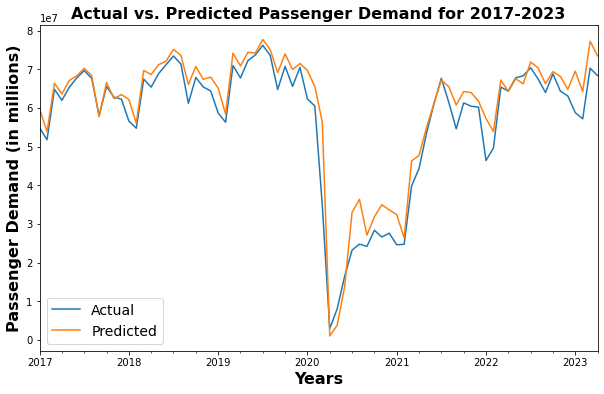

In [24]:
ax=combined.plot(figsize=(10, 6))
# Adding labels and title with increased font size and bold
ax.set_xlabel('Years', fontweight='bold', fontsize=16)
ax.set_ylabel('Passenger Demand (in millions)', fontweight='bold', fontsize=16)
ax.set_title('Actual vs. Predicted Passenger Demand for 2017-2023', fontweight='bold', fontsize=16)
plt.legend(fontsize=14)

In [45]:
# Display the coefficients obtained from the Ridge regression model
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]
ridge_coefs = ridge.coef_

print("Ridge regression coefficients:\n")
for col_name, coef in zip(predictors, ridge_coefs):
    print(f"{col_name}: {coef:.6f}")

Ridge regression coefficients:

DEPARTURES_SCHEDULED: -44.239369
PAYLOAD: -0.001005
SEATS: 1.481332
RAMP_TO_RAMP: -0.681890
AIR_TIME: 1.107223


In [46]:
from sklearn.linear_model import Ridge
import pandas as pd

# Initialize predictor variables (replace with your actual column names)
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 10e+3,10e+5,10e+7, 10e+9,10e+13, 10e+17]

# Initialize the dataframe for storing coefficients.
col = ["rss", "intercept"] + [f"coef_{col_name}" for col_name in predictors]
ind = [f"alpha_{alpha:.2g}" for alpha in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Perform Ridge regression for each alpha value
for i, alpha in enumerate(alpha_ridge):
    ridge = Ridge(alpha=alpha)
    ridge.fit(train[predictors], train["PASSENGERS"])
    coef_matrix_ridge.iloc[i, 0] = ((ridge.predict(test[predictors]) - test["PASSENGERS"]) ** 2).sum()
    coef_matrix_ridge.iloc[i, 1] = ridge.intercept_
    coef_matrix_ridge.iloc[i, 2:] = ridge.coef_

#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_DEPARTURES_SCHEDULED,coef_PAYLOAD,coef_SEATS,coef_RAMP_TO_RAMP,coef_AIR_TIME
alpha_1e-15,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_1e-10,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_1e-08,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_0.0001,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_0.001,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_0.01,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_1,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_5,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_10,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2
alpha_20,1.9e+15,-1.3e+07,-58,-0.0012,1.4,-0.56,1.2


In [52]:
from sklearn.metrics import r2_score
import numpy as np
    
    # Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    r2_value = r2_score(forecast,  actual)
#     acf1 = acf(fitted - test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax,
            'r2_value': r2_value})


accuracy_metrics = forecast_accuracy(predictions, test["PASSENGERS"])
print("Model Performance Evaluation Metrics:\n")
for key, value in accuracy_metrics.items():
    print(f"{key}: {value:.4f}")

Model Performance Evaluation Metrics:

mape: 0.0942
me: 3220908.4224
mae: 3544281.5950
mpe: 0.0574
rmse: 4892777.1039
corr: 0.9757
minmax: 0.0813
r2_value: 0.9110


/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_47638/2614554976.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
/var/folders/h7/0p4fw9dn3p79j8x28bvbcj380000gn/T/ipykernel_47638/2614554976.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)


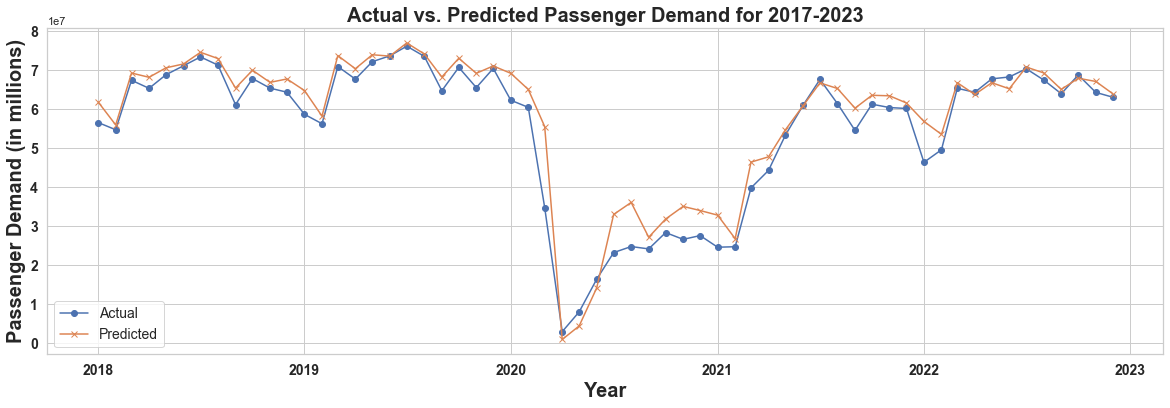

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Your existing code
reg = Ridge(alpha=0.1)  # The parameter alpha
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]
# merged_df = pd.merge(core_df_aggregated, reduced_df_aggregated, on='DATE')

# Filter data from 2008 to 2019
filtered_df = core_df_aggregated.loc["2008-01-01":"2023-12-31"]

# Initialize an empty DataFrame to store the combined data for all years
combined_all_years = pd.DataFrame()

# Split data into train and test for each year
for year in range(2017, 2022):
    if year==2017:
        train = filtered_df.loc[:f"{year}-12-31"]
    test = filtered_df.loc[f"{year + 1}-01-01":f"{year + 1}-12-31"]

    # Check if there is data available for the current year in the test set
    if not test.empty:
        reg.fit(train[predictors], train["PASSENGERS"])
        predictions = reg.predict(test[predictors])

        combined = pd.concat([test["PASSENGERS"], pd.Series(predictions, index=test.index)], axis=1)
        combined.columns = ["actual", "predicted"]

        # Append the combined data for the current year to the DataFrame for all years
        combined_all_years = pd.concat([combined_all_years, combined])

# Create a larger figure
plt.figure(figsize=(20, 6))  # Adjust the values (width, height) as per your preference
        
# Plot the combined data for all years
plt.plot(combined_all_years.index, combined_all_years["actual"], label="Actual", marker='o')
plt.plot(combined_all_years.index, combined_all_years["predicted"], label="Predicted", marker='x')

plt.xlabel('Year',fontweight='bold', fontsize=20)
plt.ylabel('Passenger Demand (in millions)',fontweight='bold', fontsize=20)
plt.title('Actual vs. Predicted Passenger Demand for 2017-2023',fontweight='bold', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
# Accessing tick labels and setting properties
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.linear_model import Lasso

# Set the option to display all columns of DataFrames without truncation
pd.set_option('display.max_columns', None)

df = pd.read_csv("consolidated_data.csv")
df.tail()

# Creates a new datetime column 'DATE' using 'YEAR' and 'MONTH' columns
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))
df.head()

# Create a new DataFrame with 'DATE' column set as the index
df_with_index = df.set_index('DATE').copy(deep=True)
df_with_index.head()

# Display the sorted correlation coefficients to identify features most positively correlated with passenger demand.
correlation_matrix = df_with_index.corr()
passengers_correlation = correlation_matrix["PASSENGERS"].sort_values(ascending=False)
passengers_correlation

# Set the correlation threshold to determine relevant features
correlation_threshold = 0.3

# Filter features based on correlation with target variable
relevant_features = passengers_correlation[passengers_correlation.abs() > correlation_threshold].index.tolist()

relevant_features

# df containing the features crucial for our analysis and modeling
core_df=df_with_index[["DEPARTURES_SCHEDULED", "DEPARTURES_PERFORMED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]]
# core_df_aggregated=core_df.groupby(core_df.index).sum()
core_df.head()

# Visualize the correlation matrix

# Create a pandas DataFrame
df_correlation_matrix = pd.DataFrame(core_df[relevant_features])

# # Compute the correlation matrix
correlation_matrix = df_correlation_matrix.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
clustermap=sns.clustermap(correlation_matrix, annot=True, annot_kws={"size": 20}, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, metric="euclidean", method="ward")
plt.title("Correlation Matrix Heatmap")

# Increase the font size of feature names (row and column labels)
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), fontsize=16)
plt.setp(clustermap.ax_heatmap.xaxis.get_majorticklabels(), fontsize=16)
plt.show()

# VIF

It is a measure of multicollinearity, which indicates how much the variance of the estimated regression coefficient is increased due to collinearity with other predictor variables. In general, a VIF value greater than 10 may suggest high multicollinearity, which can make it challenging to interpret the individual effects of the correlated variables on the target variable. Lower VIF values are desirable, indicating lower multicollinearity.

# Calculate VIF for each feature

# Create an empty DataFrame to store VIF results
vif_data = pd.DataFrame()

# Select the columns for VIF calculation
vif_df=core_df[["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]]

# Perform feature scaling
scaler = StandardScaler()
core_df_scaled = scaler.fit_transform(vif_df)

# Populate the "feature" column with the selected feature names
vif_data["Feature"] = vif_df.columns

# Calculate VIF for each feature using a loop
vif_data["VIF"] = [variance_inflation_factor(core_df_scaled, i) for i in range(len(vif_df.columns))]
vif_data

core_df=core_df[["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "PASSENGERS", "RAMP_TO_RAMP", "AIR_TIME"]]
core_df

# Aggregate the original data by summing the values of each column for each unique date,
# creating a new DataFrame with monthly aggregated data for further analysis or modeling.
core_df_aggregated=core_df.groupby(core_df.index).sum()
core_df_aggregated.head()

# Set the style of the plots
sns.set(style="whitegrid")

# Create scatter plots for each predictor variable against "PASSENGERS"
plt.figure(figsize=(12, 8))

# Create subplots
plt.subplot(2, 3, 1)
scatter = sns.scatterplot(x=core_df_aggregated['DEPARTURES_SCHEDULED'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('DEPARTURES_SCHEDULED vs PASSENGERS')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('DEPARTURES_SCHEDULED', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# plt.subplot(2, 3, 2)
# sns.scatterplot(x=core_df_aggregated['DEPARTURES_PERFORMED'], y=core_df_aggregated['PASSENGERS'])
# plt.title('DEPARTURES_PERFORMED vs PASSENGERS')
# # plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

plt.subplot(2, 3, 2)
scatter = sns.scatterplot(x=core_df_aggregated['PAYLOAD'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('PAYLOAD vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('PAYLOAD', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 3, 3)
scatter = sns.scatterplot(x=core_df_aggregated['SEATS'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('SEATS vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('SEATS', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 3, 4)
scatter = sns.scatterplot(x=core_df_aggregated['RAMP_TO_RAMP'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('RAMP_TO_RAMP vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('RAMP_TO_RAMP', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 3, 5)
scatter = sns.scatterplot(x=core_df_aggregated['AIR_TIME'], y=core_df_aggregated['PASSENGERS'])
scatter.set_title('AIR_TIME vs PASSENGERS')
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('AIR_TIME', fontweight='bold')
plt.ylabel('PASSENGERS', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5) 
plt.show()

## Why Ridge Regression?

The scatter plots show that the relationship between the predictor variables and the target variable is roughly linear, with some outliers. This suggests that ridge regression may be a good choice for predicting the target variable from the predictor variables. Ridge regression is a type of linear regression that adds a penalty to the coefficients, which helps to reduce the variance of the model and prevent overfitting. This is important because overfitting can occur when the model is too complex and learns the noise in the data instead of the underlying relationships.

Moreover, high multicollinearity can lead to unstable regression coefficient estimates and potentially misleading results. To mitigate this issue, we'll employ ridge regression, a technique that introduces regularization to the linear regression model. Ridge regression can help us manage multicollinearity, improve the stability of coefficient estimates, and enhance the predictive power of our model.

By incorporating ridge regression, we aim to create a more robust predictive model that takes into account the complex relationships among the predictor variables, ultimately enhancing the accuracy and reliability of our passenger demand predictions.

## Ridge Implementation

predictors=["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]

train=core_df_aggregated.loc[:"2016-12-01"]
train.tail()

test=core_df_aggregated.loc["2017-01-01":"2023-12-01"]
test.head()

paramters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 1e+4,1e+6,1e+8, 1e+10,1e+14, 1e+18]}
ridge = Ridge()
ridge_regressor=GridSearchCV(ridge, paramters,scoring='r2',cv=5)
ridge_regressor.fit(train[predictors], train["PASSENGERS"])
alpha_param= ridge_regressor.best_params_['alpha']
alpha_param

ridge = Ridge(alpha=alpha_param)
ridge.fit(train[predictors], train["PASSENGERS"])
predictions=ridge.predict(test[predictors])
predictions

# from sklearn.metrics import mean_squared_error
# mean_squared_error(predictions, test["PASSENGERS"])

combined=pd.concat([test["PASSENGERS"],pd.Series(predictions, index=test.index)], axis=1)
#converting the precitions numpy array as pandas series with the same index as the test data
combined.columns=["Actual", "Predicted"]
#combined["difference"] = combined["predicted"] - combined["actual"]
print("\033[1mPassenger Demand\033[0m")
combined.head(12)

ax=combined.plot(figsize=(10, 6))
# Adding labels and title with increased font size and bold
ax.set_xlabel('Years', fontweight='bold', fontsize=16)
ax.set_ylabel('Passenger Demand (in millions)', fontweight='bold', fontsize=16)
ax.set_title('Actual vs. Predicted Passenger Demand for 2017-2023', fontweight='bold', fontsize=16)
plt.legend(fontsize=14)

# Display the coefficients obtained from the Ridge regression model
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]
ridge_coefs = ridge.coef_

print("Ridge regression coefficients:\n")
for col_name, coef in zip(predictors, ridge_coefs):
    print(f"{col_name}: {coef:.6f}")

from sklearn.linear_model import Ridge
import pandas as pd

# Initialize predictor variables (replace with your actual column names)
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 10e+3,10e+5,10e+7, 10e+9,10e+13, 10e+17]

# Initialize the dataframe for storing coefficients.
col = ["rss", "intercept"] + [f"coef_{col_name}" for col_name in predictors]
ind = [f"alpha_{alpha:.2g}" for alpha in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Perform Ridge regression for each alpha value
for i, alpha in enumerate(alpha_ridge):
    ridge = Ridge(alpha=alpha)
    ridge.fit(train[predictors], train["PASSENGERS"])
    coef_matrix_ridge.iloc[i, 0] = ((ridge.predict(test[predictors]) - test["PASSENGERS"]) ** 2).sum()
    coef_matrix_ridge.iloc[i, 1] = ridge.intercept_
    coef_matrix_ridge.iloc[i, 2:] = ridge.coef_

#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

from sklearn.metrics import r2_score
import numpy as np
    
    # Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    r2_value = r2_score(forecast,  actual)
#     acf1 = acf(fitted - test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax,
            'r2_value': r2_value})


accuracy_metrics = forecast_accuracy(predictions, test["PASSENGERS"])
print("Model Performance Evaluation Metrics:\n")
for key, value in accuracy_metrics.items():
    print(f"{key}: {value:.4f}")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Your existing code
reg = Ridge(alpha=0.1)  # The parameter alpha
predictors = ["DEPARTURES_SCHEDULED", "PAYLOAD", "SEATS", "RAMP_TO_RAMP", "AIR_TIME"]
# merged_df = pd.merge(core_df_aggregated, reduced_df_aggregated, on='DATE')

# Filter data from 2008 to 2019
filtered_df = core_df_aggregated.loc["2008-01-01":"2023-12-31"]

# Initialize an empty DataFrame to store the combined data for all years
combined_all_years = pd.DataFrame()

# Split data into train and test for each year
for year in range(2017, 2022):
    if year==2017:
        train = filtered_df.loc[:f"{year}-12-31"]
    test = filtered_df.loc[f"{year + 1}-01-01":f"{year + 1}-12-31"]

    # Check if there is data available for the current year in the test set
    if not test.empty:
        reg.fit(train[predictors], train["PASSENGERS"])
        predictions = reg.predict(test[predictors])

        combined = pd.concat([test["PASSENGERS"], pd.Series(predictions, index=test.index)], axis=1)
        combined.columns = ["actual", "predicted"]

        # Append the combined data for the current year to the DataFrame for all years
        combined_all_years = pd.concat([combined_all_years, combined])

# Create a larger figure
plt.figure(figsize=(20, 6))  # Adjust the values (width, height) as per your preference
        
# Plot the combined data for all years
plt.plot(combined_all_years.index, combined_all_years["actual"], label="Actual", marker='o')
plt.plot(combined_all_years.index, combined_all_years["predicted"], label="Predicted", marker='x')

plt.xlabel('Year',fontweight='bold', fontsize=20)
plt.ylabel('Passenger Demand (in millions)',fontweight='bold', fontsize=20)
plt.title('Actual vs. Predicted Passenger Demand for 2017-2023',fontweight='bold', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
# Accessing tick labels and setting properties
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()

# End of Ridge regression to predict passenger demand

# SARIMA for passenger demand forecasting  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from sklearn.metrics import r2_score

In [2]:
# Read the main aircraft dataset
aircraft_data = pd.read_csv("consolidated_data.csv")

/var/folders/y0/_21zm_c973n2syvg711kqqzm0000gn/T/ipykernel_24283/265863835.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  aircraft_data = pd.read_csv("consolidated_data.csv")


In [3]:
# View the aircraft dataset 
aircraft_data

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Alaska,1,4,405,1,2008,2,4,1,F
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,Alaska,1,0,35,1,2008,2,6,1,L
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,Alaska,1,0,35,1,2008,2,6,1,L
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,Alaska,1,0,35,1,2008,2,6,1,L
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,Alaska,1,0,35,1,2008,2,6,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531395,760.0,754.0,23852100.0,96512.0,74019.0,489932.0,0.0,100.0,33935.0,16416.0,...,Hawaii,2,6,608,1,2023,1,3,1,F
5531396,779.0,779.0,934800.0,4102.0,2077.0,14823.0,0.0,11.0,10554.0,8217.0,...,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,2,4,1,F
5531397,780.0,780.0,936000.0,4105.0,1961.0,3107.0,0.0,11.0,10068.0,7728.0,...,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,2,4,1,F
5531398,875.0,875.0,1050000.0,4547.0,2382.0,14878.0,0.0,11.0,11890.0,9265.0,...,U.S. Pacific Trust Territories and Possessions,5,0,79,1,2023,1,3,1,F


In [4]:
# Create a new column for date
aircraft_data["MONTH"] = aircraft_data["MONTH"].map(str).str.zfill(2)
aircraft_data["YEAR"] = aircraft_data["YEAR"].map(str)

# Convert 'year' and 'month' columns to datetime format and create 'DATE' column
aircraft_data['DATE'] = pd.to_datetime(aircraft_data[['YEAR', 'MONTH']].assign(day=1))

In [5]:
# Group by 'date' and sum the 'passenger_number' for each date
aggregated_month_df = aircraft_data.groupby('DATE')['PASSENGERS'].sum().reset_index()
aggregated_month_df

,DATE,PASSENGERS
0,2008-01-01,51589862.0
1,2008-02-01,51421707.0
2,2008-03-01,60773856.0
3,2008-04-01,57007002.0
4,2008-05-01,59463217.0
...,...,...
179,2022-12-01,63087628.0
180,2023-01-01,58757519.0
181,2023-02-01,57157467.0
182,2023-03-01,70258611.0


In [6]:
# Set 'DATE' column as the index
aggregated_month_df.set_index('DATE', inplace=True)

# Check datatype of index
aggregated_month_df.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='DATE', length=184, freq=None)

In [7]:
aggregated_month_df

,PASSENGERS
DATE,
2008-01-01,51589862.0
2008-02-01,51421707.0
2008-03-01,60773856.0
2008-04-01,57007002.0
2008-05-01,59463217.0
...,...
2022-12-01,63087628.0
2023-01-01,58757519.0
2023-02-01,57157467.0


In [8]:
# Adding new column S.No. to check the total number of records
aggregated_month_df.insert(1, 'S.No.', range(1, 1 + len(aggregated_month_df)))

In [9]:
aggregated_month_df

,PASSENGERS,S.No.
DATE,,
2008-01-01,51589862.0,1
2008-02-01,51421707.0,2
2008-03-01,60773856.0,3
2008-04-01,57007002.0,4
2008-05-01,59463217.0,5
...,...,...
2022-12-01,63087628.0,180
2023-01-01,58757519.0,181
2023-02-01,57157467.0,182


In [10]:
# Setting the frequency of a time series index to "Month Start" frequency
aggregated_month_df.index.freq="MS"

In [11]:
aggregated_df_sliced= aggregated_month_df.loc["2008-01-01":"2019-12-01"]
aggregated_df_sliced

,PASSENGERS,S.No.
DATE,,
2008-01-01,51589862.0,1
2008-02-01,51421707.0,2
2008-03-01,60773856.0,3
2008-04-01,57007002.0,4
2008-05-01,59463217.0,5
...,...,...
2019-08-01,73573502.0,140
2019-09-01,64749961.0,141
2019-10-01,70734803.0,142


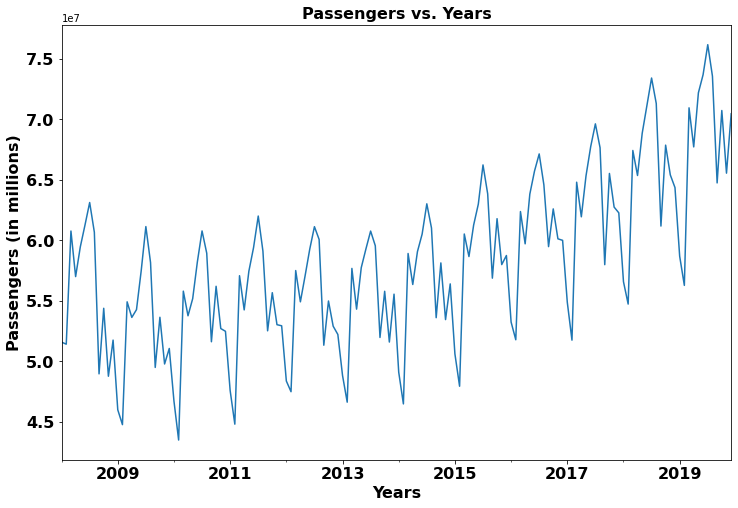

In [12]:
# Plot the passenger demand vs years
aggregated_df_sliced['PASSENGERS'].plot(figsize=(12,8))

# Adding labels and title with increased font size
plt.xlabel('Years', fontweight='bold', fontsize=16)
plt.ylabel('Passengers (in millions)', fontweight='bold', fontsize=16)
plt.title('Passengers vs. Years', fontweight='bold', fontsize=16)

# Accessing tick labels and setting properties
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

plt.show()

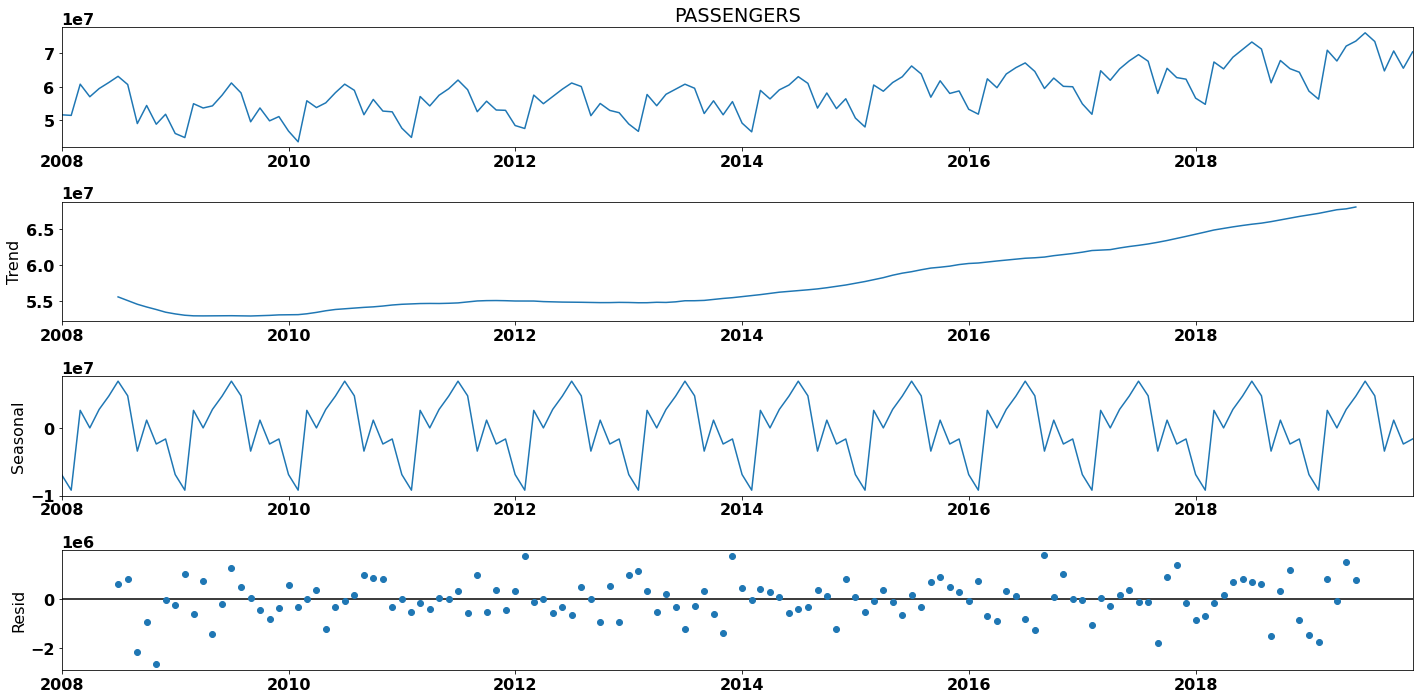

In [42]:
# Set the font size and weight for the entire plot
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'

# Additive seasonal decompostion of the time series into its constituents components (trend, seasonal and residual)
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(aggregated_df_sliced['PASSENGERS'], model='additive')
fig = decomposition.plot()

# Make x-axis and y-axis tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

### ADF Test

For confirming whether the data is stationary, a most commonly used statistical procedure, namely Augmented Dickey Fuller (ADF) Test is used. 

The ADF test is performed with the following assumptions:

###### Null Hypothesis (H0):  Data is not stationary (p value > 0.05)

###### Alternate Hypothesis (H1):  Data is stationary (p value <= 0.05)

In [14]:
#Augmented Dickey Fuller Test
def adf_test(series):
    adf = adfuller(series)
    print("\nStatistics analysis\n")
    print("Statistic Test : " , adf[0])
    print("p-value : " , adf[1])
    print("# n_lags : " , adf[2])
    print("No of observations: " , adf[3])
    for key,value in adf[4].items():
        print(f"Critical value {key} : {value}")
    if(adf[1]<=0.05):
        print("\nStrong evidence against the null hypothesis (Time series is non-stationary),reject the null hypothesis. \nTime series has no unit root, indicating it is stationary")
    else:
        print("\nWeak evidence against the null hypothesis (Time series is non-stationary). \nThe time series has a unit root, indicating it is non-stationary.")

In [15]:
# ADF Test before differencing
adf_test(aggregated_df_sliced['PASSENGERS'])


Statistics analysis

Statistic Test :  2.00743138145957
p-value :  0.9986825300043168
# n_lags :  14
No of observations:  129
Critical value 1% : -3.482087964046026
Critical value 5% : -2.8842185101614626
Critical value 10% : -2.578864381347275

Weak evidence against the null hypothesis (Time series is non-stationary). 
The time series has a unit root, indicating it is non-stationary.


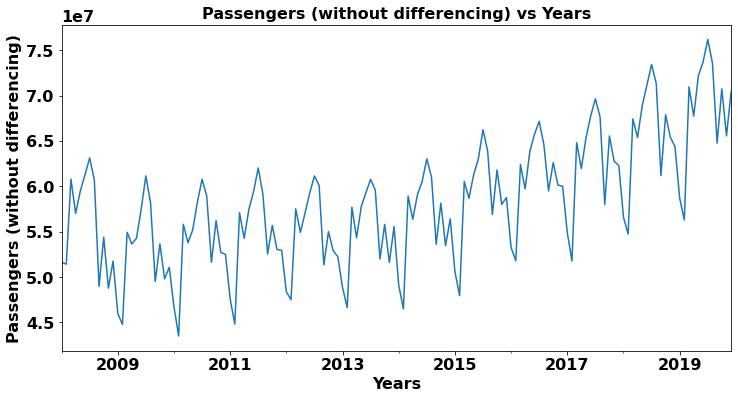

/Users/j4rv15/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


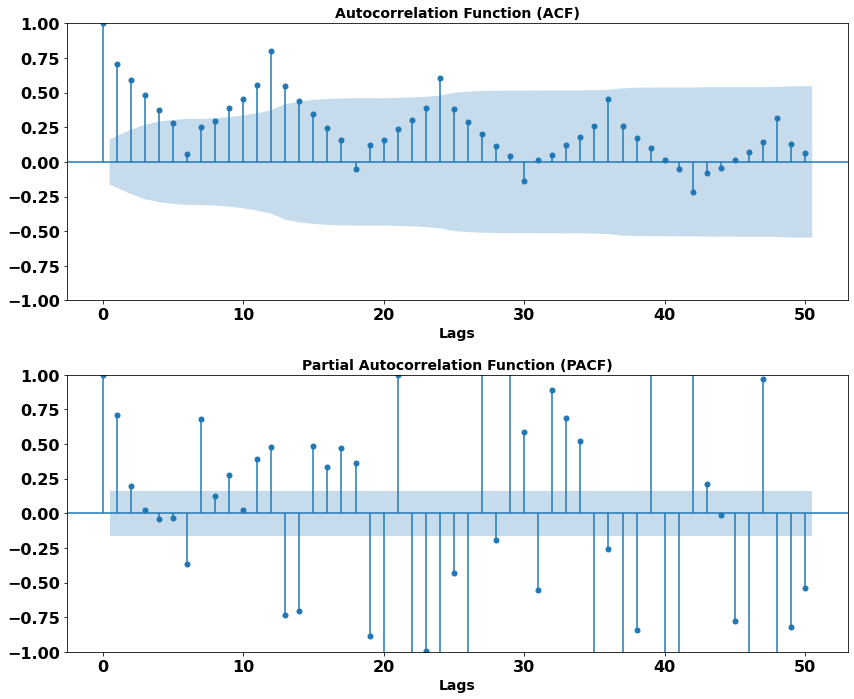

In [16]:
# Before differencing is performed

# Plot the Time Series Data
plt.figure(figsize=(12, 6))
aggregated_df_sliced['PASSENGERS'].dropna().plot()
plt.xlabel('Years', fontweight='bold', fontsize=16)
plt.ylabel('Passengers (without differencing)', fontweight='bold', fontsize=16)
plt.title('Passengers (without differencing) vs Years', fontweight='bold', fontsize=16)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.show()

# Create a new figure for ACF and PACF plots with spacing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Adjust figsize and spacing here
plot_acf(aggregated_df_sliced['PASSENGERS'].dropna(), lags=50, ax=ax1)
plot_pacf(aggregated_df_sliced['PASSENGERS'].dropna(), lags=50, ax=ax2)

# Set labels and values bold for ACF and PACF plots
ax1.set_xlabel('Lags', fontweight='bold', fontsize=14)
ax1.set_title('Autocorrelation Function (ACF)', fontweight='bold', fontsize=14)

ax2.set_xlabel('Lags', fontweight='bold', fontsize=14)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontweight='bold', fontsize=14)

plt.tight_layout()  # Add spacing between subplots
plt.show()

# Differencing

The differencing is the process of determining the variation between the current value of a time series and its previous value. For some cases, a time series may not become stationary after one difference process. In such cases, differencing needs to applied multiple times until the series become stationary.

In [17]:
# ADF Test after differencing - 1 month - "d" value for ARIMA

# Perform differencing
aggregated_df_sliced['PASSENGERS FIRST DIFFERENCE'] = aggregated_df_sliced['PASSENGERS'].diff().dropna()  # Differencing and dropping NaN

#ADF Test
adf_test(aggregated_df_sliced['PASSENGERS FIRST DIFFERENCE'].dropna())


Statistics analysis

Statistic Test :  -3.5654163703257233
p-value :  0.006457671886042506
# n_lags :  14
No of observations:  128
Critical value 1% : -3.4825006939887997
Critical value 5% : -2.884397984161377
Critical value 10% : -2.578960197753906

Strong evidence against the null hypothesis (Time series is non-stationary),
reject the null hypothesis. 
Time series has no unit root, indicating it is stationary


/var/folders/y0/_21zm_c973n2syvg711kqqzm0000gn/T/ipykernel_24283/557852850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df_sliced['PASSENGERS FIRST DIFFERENCE'] = aggregated_df_sliced['PASSENGERS'].diff().dropna()  # Differencing and dropping NaN


# Identification of parameters of the model

To identify a potential order of p, q, P and Q for the SARIMA model, two plots can be utilised: autocorrelation function (ACF) and the partial autocorrelation function (PACF).

The ACF illustrates the relationship between the data and its previous values at different lags, whereas the PACF reveals this relationship while eliminating the impact of intervening data points.


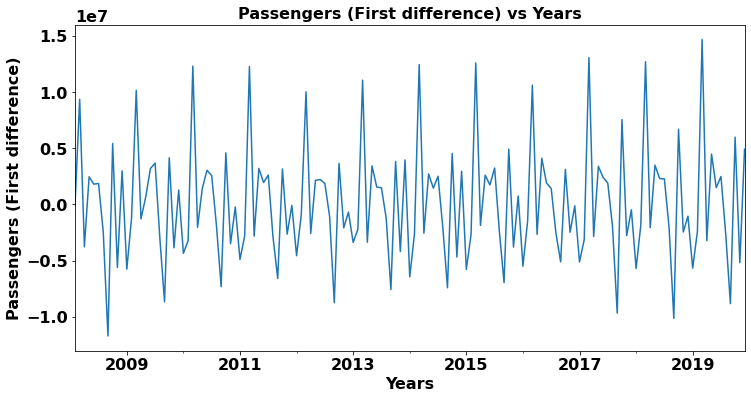

/Users/j4rv15/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


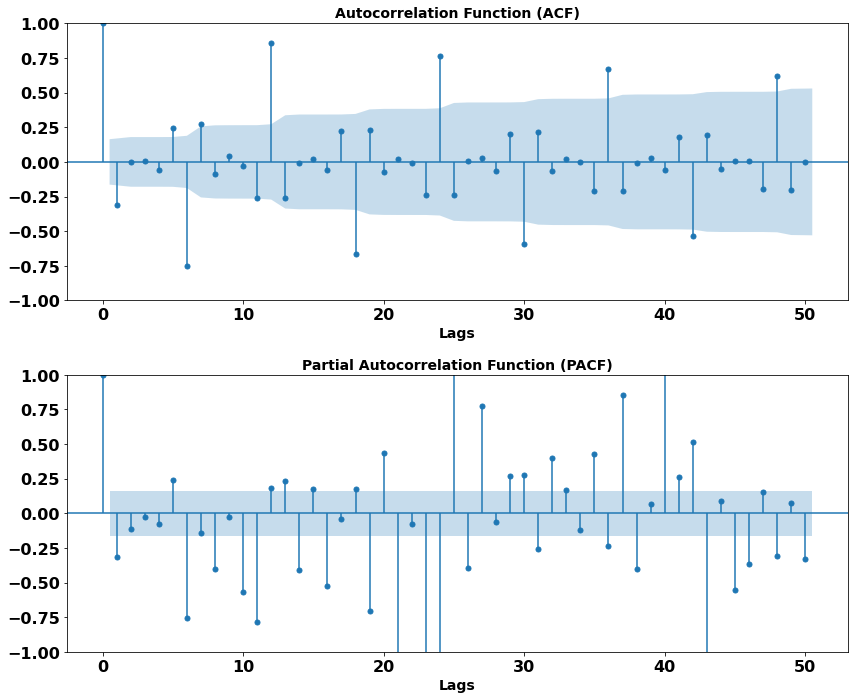

In [43]:
# Plot the Time Series Data (First Difference)

plt.figure(figsize=(12, 6))
aggregated_df_sliced['PASSENGERS FIRST DIFFERENCE'].dropna().plot()
plt.xlabel('Years', fontweight='bold', fontsize=16)
plt.ylabel('Passengers (First difference)', fontweight='bold', fontsize=16)
plt.title('Passengers (First difference) vs Years', fontweight='bold', fontsize=16)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.show()

# Create a new figure for ACF and PACF plots with spacing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Adjust figsize and spacing here
plot_acf(aggregated_df_sliced['PASSENGERS FIRST DIFFERENCE'].dropna(), lags=50, ax=ax1)
plot_pacf(aggregated_df_sliced['PASSENGERS FIRST DIFFERENCE'].dropna(), lags=50, ax=ax2)

# Set labels and values bold for ACF and PACF plots
ax1.set_xlabel('Lags', fontweight='bold', fontsize=14)
ax1.set_title('Autocorrelation Function (ACF)', fontweight='bold', fontsize=14)

ax2.set_xlabel('Lags', fontweight='bold', fontsize=14)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontweight='bold', fontsize=14)

plt.tight_layout()  # Add spacing between subplots
plt.show()


In [19]:
aggregated_df_sliced

,PASSENGERS,S.No.,PASSENGERS FIRST DIFFERENCE
DATE,,,
2008-01-01,51589862.0,1,NaN
2008-02-01,51421707.0,2,-168155.0
2008-03-01,60773856.0,3,9352149.0
2008-04-01,57007002.0,4,-3766854.0
2008-05-01,59463217.0,5,2456215.0
...,...,...,...
2019-08-01,73573502.0,140,-2601855.0
2019-09-01,64749961.0,141,-8823541.0
2019-10-01,70734803.0,142,5984842.0


In [20]:
# ADF Test - 12 months - "D" value for SARIMA

# Perform seasonal differencing
aggregated_df_sliced['PASSENGERS 12 DIFFERENCE'] = aggregated_df_sliced['PASSENGERS'].diff(12).dropna()  # Differencing and dropping NaN

#ADF Test
adf_test(aggregated_df_sliced['PASSENGERS 12 DIFFERENCE'].dropna())


Statistics analysis

Statistic Test :  -3.2327505379491557
p-value :  0.018165511667563635
# n_lags :  7
No of observations:  124
Critical value 1% : -3.484219653271961
Critical value 5% : -2.885145235641637
Critical value 10% : -2.579359138917794

Strong evidence against the null hypothesis (Time series is non-stationary),
reject the null hypothesis. 
Time series has no unit root, indicating it is stationary


/var/folders/y0/_21zm_c973n2syvg711kqqzm0000gn/T/ipykernel_24283/4083857971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df_sliced['PASSENGERS 12 DIFFERENCE'] = aggregated_df_sliced['PASSENGERS'].diff(12).dropna()  # Differencing and dropping NaN


In [21]:
aggregated_df_sliced

,PASSENGERS,S.No.,PASSENGERS FIRST DIFFERENCE,PASSENGERS 12 DIFFERENCE
DATE,,,,
2008-01-01,51589862.0,1,NaN,NaN
2008-02-01,51421707.0,2,-168155.0,NaN
2008-03-01,60773856.0,3,9352149.0,NaN
2008-04-01,57007002.0,4,-3766854.0,NaN
2008-05-01,59463217.0,5,2456215.0,NaN
...,...,...,...,...
2019-08-01,73573502.0,140,-2601855.0,2257555.0
2019-09-01,64749961.0,141,-8823541.0,3565803.0
2019-10-01,70734803.0,142,5984842.0,2862638.0


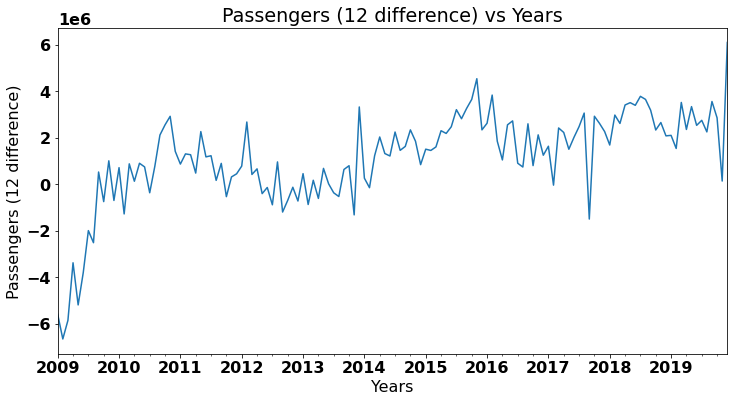

/Users/j4rv15/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


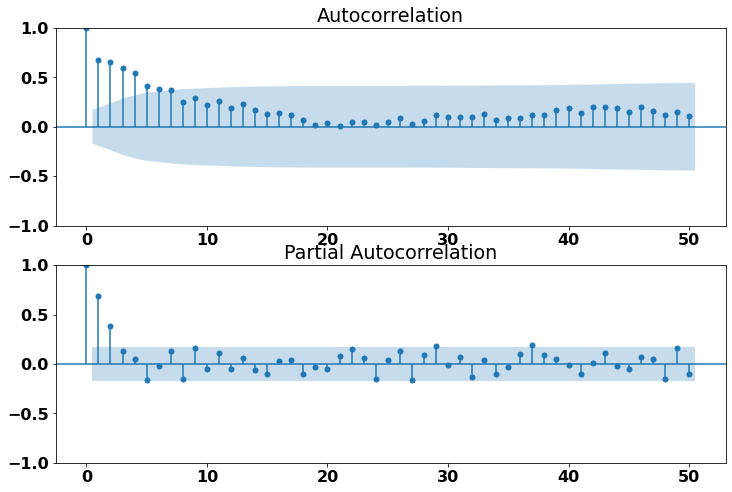

In [22]:
# Plot the Time Series Data
aggregated_df_sliced['PASSENGERS 12 DIFFERENCE'].dropna().plot(figsize=(12, 6))
plt.xlabel('Years')
plt.ylabel('Passengers (12 difference)')
plt.title('Passengers (12 difference) vs Years')
plt.show()

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(aggregated_df_sliced['PASSENGERS 12 DIFFERENCE'].dropna(), lags=50, ax=ax1)
plot_pacf(aggregated_df_sliced['PASSENGERS 12 DIFFERENCE'].dropna(), lags=50, ax=ax2)
plt.show()

In [23]:
# Creating training and test dataset
training_df =  pd.DataFrame(aggregated_month_df["PASSENGERS"].loc["2008-01-01":"2016-12-01"])
test_df=  pd.DataFrame(aggregated_month_df["PASSENGERS"].loc["2017-01-01":"2023-12-01"])

In [24]:
training_df

,PASSENGERS
DATE,
2008-01-01,51589862.0
2008-02-01,51421707.0
2008-03-01,60773856.0
2008-04-01,57007002.0
2008-05-01,59463217.0
...,...
2016-08-01,64592344.0
2016-09-01,59484196.0
2016-10-01,62601986.0


In [25]:
test_df

,PASSENGERS
DATE,
2017-01-01,54891195.0
2017-02-01,51753362.0
2017-03-01,64809833.0
2017-04-01,61948463.0
2017-05-01,65338858.0
...,...
2022-12-01,63087628.0
2023-01-01,58757519.0
2023-02-01,57157467.0


## Grid Search 

This step is parameter selection for our passenger demand SARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [44]:
# Define the range of parameters for the grid search
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [45]:
# Initialise the values
best_aic = float("inf")
best_params = None
best_seasonal_params = None

# Iterate through all combinations of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Fit SARIMA model
            mod = sm.tsa.statespace.SARIMAX(training_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            # Check AIC and update best parameters if needed
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except Exception as e:
            print(e)
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90847D+01    |proj g|=  3.55318D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.553D-10   1.908D+01
  F =   19.084676476587582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4124.290118942918
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3603.069158938908
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40210D+01    |proj g|=  2.34477D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.345D-08   1.402D+01
  F =   14.020996095883463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3030.5351567108282
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2643.5740724824573
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28772D+01    |proj g|=  6.38853D+00

At iterate    5    f=  1.20612D+01    |proj g|=  3.01630D-01

At iterate   10    f=  1.19897D+01    |proj g|=  3.53463D-01

At iterate   15    f=  1.19823D+01    |proj g|=  1.02693D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.027D-05   1.198D+01
  F =   11.982300736475835     

CONVERGENCE: 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.49008D+01    |proj g|=  5.36207D+02

At iterate   20    f=  1.78003D+01    |proj g|=  1.52904D+01

At iterate   25    f=  1.64136D+01    |proj g|=  4.53825D-01

At iterate   30    f=  1.63724D+01    |proj g|=  5.61735D-03

At iterate   35    f=  1.63724D+01    |proj g|=  5.12195D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     41      1     0     0   2.556D-06   1.637D+01
  F =   16.372367166379984     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3542.4313079380763
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66801D+01    |proj g|=  1.08211D-02

At iterate    5    f=  1.66782D+01    |proj g|=  2.07335D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   9.284D-06   1.668D+01
  F =   16.678138565684588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3608.4779301878707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.18405D+01    |proj g|=  1.20941D-02

At iterate   10    f=  1.18405D+01    |proj g|=  3.16961D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   4.708D-05   1.184D+01
  F =   11.840505012531320     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2565.549082706765
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3569.499283673637At iterate    0    f= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/Users/j4rv15/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.17075D+01    |proj g|=  9.75122D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     11      1     0     0   8.846D-08   1.171D+01
  F =   11.707530458734514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2532.826579086655
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36062D+01    |proj g|=  6.79732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.17066D+01    |proj g|=  1.07548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   3.586D-06   1.171D+01
  F =   11.706565135744304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2534.61806932077
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62911D+01    |proj g|=  7.03246D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2469.27985397243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43596D+01    |proj g|=  1.47531D-01

At iterate    5    f=  1.43401D+01    |proj g|=  1.76221D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.762D-07   1.434D+01
  F =   14.340111106584448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:3103.463999022241
RUNNING THE L-BFGS-B CO

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14721D+01    |proj g|=  6.68305D-01

At iterate    5    f=  1.14046D+01    |proj g|=  1.23586D-02

At iterate   10    f=  1.14042D+01    |proj g|=  1.68119D-02

At iterate   15    f=  1.14040D+01    |proj g|=  1.52086D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.080D-05   1.140D+01
  F =   11.404008356151166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0,

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.46748D+01    |proj g|=  1.91965D+00

At iterate   10    f=  1.45250D+01    |proj g|=  7.07418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     26      1     0     0   6.415D-05   1.452D+01
  F =   14.518228158884131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:3141.9372823189724
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35693D+01    |proj g|=  1.32047D-05

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.43850D+01    |proj g|=  3.64696D-02

At iterate   10    f=  1.43823D+01    |proj g|=  2.71655D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     21      1     0     0   1.664D-05   1.438D+01
  F =   14.382264371835936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:3114.569104316562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18577D+01    |proj g|=  2.51199D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2896.508627283202
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68255D+01    |proj g|=  4.12907D+01

At iterate    5    f=  1.15792D+01    |proj g|=  2.33166D-01

At iterate   10    f=  1.15333D+01    |proj g|=  2.39875D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.128D-04   1.153D+01
  F =   11.533305621763207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3103.9674489564777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41895D+01    |proj g|=  1.16128D-01

At iterate    5    f=  1.41791D+01    |proj g|=  3.65162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     11      1     0     0   1.447D-05   1.418D+01
  F =   14.179102026964301     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3072.686037824289
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate   25    f=  1.15253D+01    |proj g|=  5.95971D-02

At iterate   30    f=  1.15252D+01    |proj g|=  9.81821D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     42      1     0     0   9.818D-05   1.153D+01
  F =   11.525156785823945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2499.433865737972
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64660D+01    |proj g|=  5.43494D-06

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2510.6520307584797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41915D+01    |proj g|=  1.28501D-02

At iterate    5    f=  1.41901D+01    |proj g|=  1.57225D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   1.572D-06   1.419D+01
  F =   14.190109677738532     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:3071.063690391523
RUNNING THE L-BFGS-B 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2510.7068763060197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16311D+01    |proj g|=  4.31869D-01

At iterate    5    f=  1.15960D+01    |proj g|=  1.71790D-03

At iterate   10    f=  1.15956D+01    |proj g|=  4.19071D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   7.677D-05   1.160D+01
  F =   11.595585716652316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3521.1782565783365
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42389D+01    |proj g|=  1.06245D+00

At iterate    5    f=  1.41609D+01    |proj g|=  8.04301D-03

At iterate   10    f=  1.41599D+01    |proj g|=  7.86848D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   5.747D-06   1.416D+01
  F =   14.159857961893245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.13992D+01    |proj g|=  9.22509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   1.721D-05   1.140D+01
  F =   11.399121497159904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2470.2102433865393
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41819D+01    |proj g|=  6.93426D-03

At iterate    5    f=  1.41809D+01    |proj g|=  2.01129D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3039.9190077566573
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15481D+01    |proj g|=  7.13310D-02

At iterate    5    f=  1.15363D+01    |proj g|=  6.22977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   1.856D-05   1.154D+01
  F =   11.536259137679137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2499.8319737386937
RUNNING THE L-BFGS-B

 This problem is unconstrained.



At iterate    5    f=  1.14004D+01    |proj g|=  3.00116D-02

At iterate   10    f=  1.13992D+01    |proj g|=  8.30630D-03

At iterate   15    f=  1.13991D+01    |proj g|=  8.28422D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     26      1     0     0   8.284D-06   1.140D+01
  F =   11.399110350912038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2472.207835797


In [46]:
# Print the best parameters found from Grid Search
print("Best ARIMA parameters:", best_params)
print("Best seasonal parameters:", best_seasonal_params)
print("Best AIC:", best_aic)

Best ARIMA parameters: (0, 1, 1)
Best seasonal parameters: (0, 1, 1, 12)
Best AIC: 2469.27985397243


In [47]:
#Fit the time series to the SARIMA model with the optimal paramters found
mod = sm.tsa.statespace.SARIMAX(training_df,
                                order=best_params,   
                                seasonal_order=best_seasonal_params,   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15877D+01    |proj g|=  2.14169D+00

At iterate    5    f=  1.14044D+01    |proj g|=  2.67293D-02

At iterate   10    f=  1.14041D+01    |proj g|=  1.88104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   1.881D-05   1.140D+01
  F =   11.404073398020509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         PASSENGERS   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1231.640
Date:                            Fri, 18 Aug 2023   AIC                           2469.280
Time:                                    22:27:45   BIC                           2476.463
Sample:                                01-01-2008   HQIC                          2472.162
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6815      0.106     -6.457      0.000      -0.888      -0.475
ma.S.L12      -0.0639      0.116     -0.553      0.580      -0.290       0.162
sigma2      1.163e+12   1.49e-14   7.82e+25      0.000    1.16e+12    1.16e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 6.51
Prob(Q):                              0.60   Prob(JB):                         0.04
Heteroskedasticity (H):               0.92   Skew:                             0.57
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.13e+41. Standard errors may be unstable.
"""

# Model Diagnostic Check

Model diagnostic check is performed which is essential to verify that the residuals (difference between the fitted and actual values) of our SARIMA model exhibit no correlation and adhere to a normal distribution with a mean of zero (white noise). If these properties are not met by the SARIMA model, it suggests a potential for further improvements.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


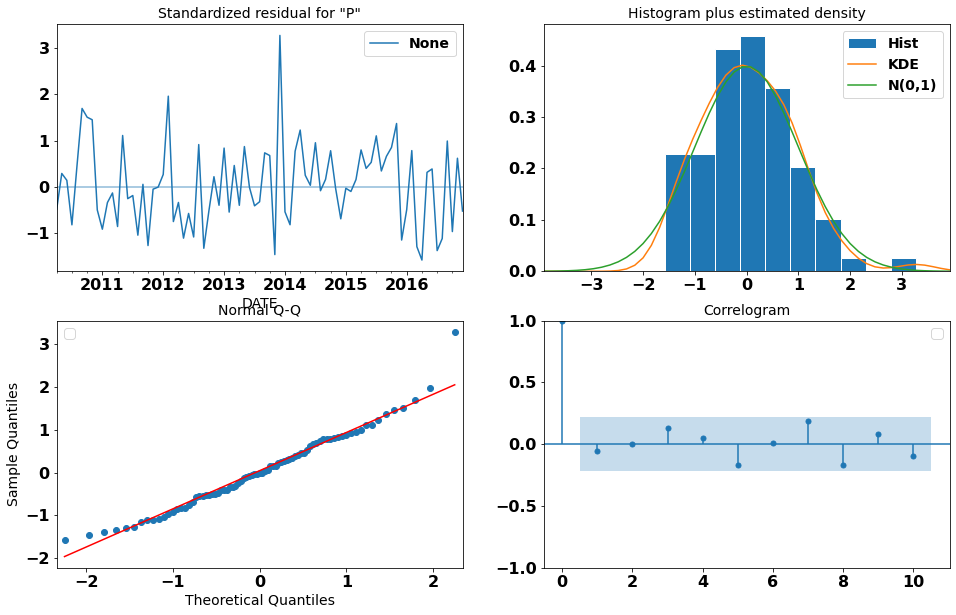

In [49]:
# To investigate for any unusual behavior and ensure that none of the assumptions made by the model have been violated
diagnostics = results.plot_diagnostics(figsize=(16, 10))

# Customize labels and font size
for ax in diagnostics.axes:
    ax.title.set_fontsize(14)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    ax.legend(fontsize=14)

plt.show()

In [58]:
# Create a new DataFrame with the desired dates for prediction (for this case till 01 December 2023)
end_date = pd.to_datetime('2023-12-01')
date_range = pd.date_range(start=test_df.index[-1] + pd.DateOffset(months=1), end=end_date, freq='MS')
df_additional_dates = pd.DataFrame({'DATE': date_range, 'PASSENGERS': 0})
df_additional_dates.set_index('DATE', inplace=True)

# Concatenate the original DataFrame with the new DataFrame to form an extended test dataframe with dates for future months as well
test_df_ext = pd.concat([test_df, df_additional_dates])
test_df_ext

,PASSENGERS
DATE,
2017-01-01,54891195.0
2017-02-01,51753362.0
2017-03-01,64809833.0
2017-04-01,61948463.0
2017-05-01,65338858.0
...,...
2023-08-01,0.0
2023-09-01,0.0
2023-10-01,0.0


In [59]:
# Check the length of the training dataset
len(training_df)

108

In [60]:
# Check the length of the test dataset
len(test_df_ext)

84

In [61]:
# Obtain predicted values
start = len(training_df)
end = len(training_df)+len(test_df_ext)-1
predictions = results.predict(start=start, end=end, dynamic=False, type='level')

In [62]:
# Predictions within the test dataset only
predictions

2017-01-01    5.486969e+07
2017-02-01    5.332846e+07
2017-03-01    6.405185e+07
2017-04-01    6.143177e+07
2017-05-01    6.544783e+07
                  ...     
2023-08-01    7.640151e+07
2023-09-01    7.117267e+07
2023-10-01    7.440361e+07
2023-11-01    7.184308e+07
2023-12-01    7.178262e+07
Freq: MS, Name: predicted_mean, Length: 84, dtype: float64

In [63]:
# Comparison of predictions to expected values (test dataset)
for i in range(len(predictions)) :
    print(f"predicted=={predictions[i]:<11.10}, expected={test_df_ext['PASSENGERS'][i]}")

predicted==54869686.62, expected=54891195.0
predicted==53328464.73, expected=51753362.0
predicted==64051853.67, expected=64809833.0
predicted==61431772.26, expected=61948463.0
predicted==65447825.2 , expected=65338858.0
predicted==67338347.72, expected=67751425.0
predicted==68868635.69, expected=69631699.0
predicted==66326528.96, expected=67659797.0
predicted==61097687.99, expected=57992106.0
predicted==64328623.86, expected=65533208.0
predicted==61768096.91, expected=62752411.0
predicted==61707634.68, expected=62276302.0
predicted==56548850.45, expected=56584461.0
predicted==55007628.57, expected=54735457.0
predicted==65731017.51, expected=67431448.0
predicted==63110936.1 , expected=65363908.0
predicted==67126989.03, expected=68854659.0
predicted==69017511.56, expected=71153255.0
predicted==70547799.53, expected=73419879.0
predicted==68005692.8 , expected=71315947.0
predicted==62776851.83, expected=61184158.0
predicted==66007787.7 , expected=67872165.0
predicted==63447260.75, expected

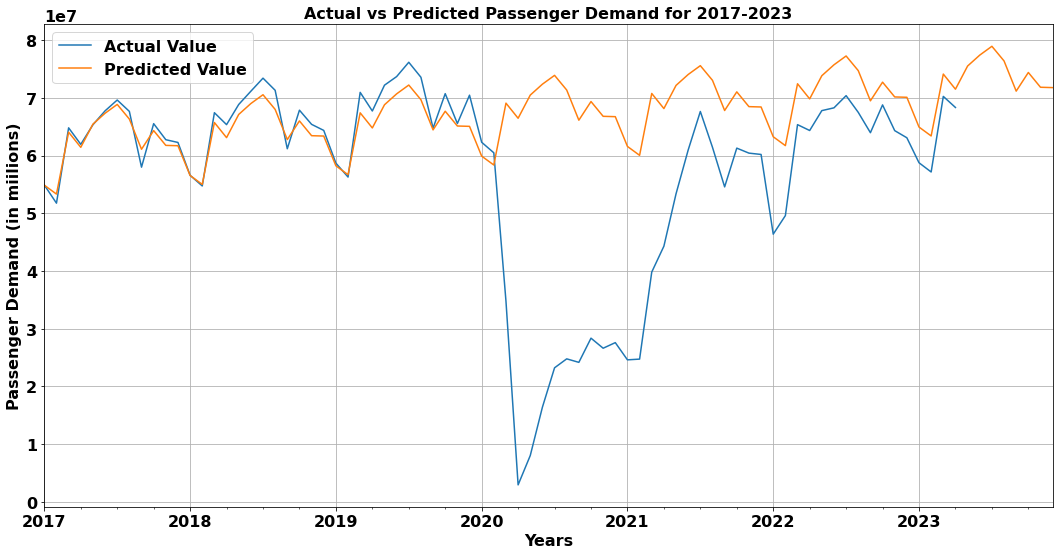

In [64]:
# Comparison between predicted and actual values
title = "Actual vs Predicted Passenger Demand for 2017-2023"
ylabel = 'Passenger Demand (in miilions)'
xlabel = 'Years'

# Create the plot
ax = test_df_ext['PASSENGERS'].loc["2017-01-01":"2023-04-01"].plot(
    legend=True, label='Actual Value', figsize=(15, 8), title=title)

# Add the predicted values to the plot
predictions.plot(legend=True, label='Predicted Value', grid=True)

# Autoscale the x-axis and set labels
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

# Adding labels and title with increased font size
plt.xlabel('Years', fontweight='bold', fontsize=16)
plt.ylabel(ylabel, fontweight='bold', fontsize=16)
plt.title(title, fontweight='bold', fontsize=16)

# Accessing tick labels and setting properties
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Adding legend and formatting
plt.legend(loc='best', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

In [65]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                           # ME
    mae = np.mean(np.abs(forecast - actual))                  # MAE
    mpe = np.mean((forecast - actual)/actual)                 # MPE
    rmse = np.mean((forecast - actual)**2)**.5                # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]                 # Correlation Score
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)                           # Minmax
    r2_value = r2_score(forecast,  actual)                    # R2 Score
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,'corr':corr, 
            'minmax':minmax,'r2_value': r2_value})

#Set the date range for error metric calculations (COVID Years excluded)
accuracy_metrics = forecast_accuracy(predictions.loc["2017-01-01":"2019-12-01"], test_df_ext['PASSENGERS'].loc["2017-01-01":"2019-12-01"])

print("Model Performance Evaluation Metrics:\n")
for key, value in accuracy_metrics.items():
    print(f"{key}: {value:.4f}")

Model Performance Evaluation Metrics:

mape: 0.0256
me: -1352625.0276
mae: 1744906.8447
mpe: -0.0187
rmse: 2207485.5766
corr: 0.9763
minmax: 0.0255
r2_value: 0.7770


/var/folders/y0/_21zm_c973n2syvg711kqqzm0000gn/T/ipykernel_24283/2218147852.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
/var/folders/y0/_21zm_c973n2syvg711kqqzm0000gn/T/ipykernel_24283/2218147852.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)


# End of SARIMA for pasenge demand forecasting